In [944]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlsxwriter
import scipy as sp
from scipy import signal
from scipy.signal import chirp, find_peaks, peak_widths
from scipy import ndimage, misc
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
import plotly 
from matplotlib import cm
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from __future__ import division, print_function
import skfuzzy as fuzz
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.mixture import GaussianMixture as GMM

### 1. Read data

In [2]:
reader2 = csv.reader(open('data_sample4008.csv', "r"), delimiter = ",")
houses = list(reader2)

df_houses = pd.DataFrame(houses)

Houses_array = {}
for i in range(1,5):
    house = extract_house2(i)
    if len(house) == 365:
        selected_house = Multiple_data_format(house)
        Houses_array[i] = selected_house

In [675]:
Houses_array = []
for i in range(1,200):
    house = extract_house2(i)
    if len(house) == 365:
        Houses_array.append(i)

In [93]:
def extract_house2(num):
    house = []
    for i in range(len(houses)):
        if houses[i][0] == str(num):
            each = houses[i]
            house.append(each)
    return house

In [94]:
def Multiple_data_format(array): #text file into dataframe
    df = pd.DataFrame(array)
    df.pop(1)
    matrix = df.astype(float)
    matrix = matrix.transpose()
    return matrix

In [95]:
def data_format(array): #text file into dataframe
    df = pd.DataFrame(array)
    matrix = df.iloc[:,2:]
    matrix = matrix.astype(float)
    matrix = matrix.transpose()
    return matrix

In [96]:
def show_pos (array):
    array_new = []
    for i in array:
        if i < 0:
            i = 0
            array_new.append(i)
        else:
            array_new.append(i)
    return array_new

In [97]:
def reshaping(df):
    df2 = df.reset_index(drop=True)
    df2 = df2.transpose()
    df2_array = df2.values
    shape = len(df2_array)*48
    reshaped_usage = df2_array.reshape(shape)
    return reshaped_usage

### LAmin()

In [554]:
def data_format(array): #text file into dataframe
    df = pd.DataFrame(array)
    matrix = df.iloc[:,2:]
    matrix = matrix.astype(float)
    matrix = matrix.transpose()
    return matrix

def show_pos (array):
    array_new = []
    for i in array:
        if i < 0:
            i = 0
            array_new.append(i)
        else:
            array_new.append(i)
    return array_new

def reshaping(df):
    df2 = df.reset_index(drop=True)
    df2 = df2.transpose()
    df2_array = df2.values
    shape = len(df2_array)*48
    reshaped_usage = df2_array.reshape(shape)
    return reshaped_usage

def extract_house2(num):
    house = []
    for i in range(len(houses)):
        if houses[i][0] == str(num):
            each = houses[i]
            house.append(each)
    return house

def SLmin(array, w):
    min_array = []
    ex = (w-1)//2
    ex = [0]*ex
    array = ex + array + ex
    flag = w
    for i in range(len(array)): 
        sample = array[i:flag]
        min_ = -min(sample)
        min_array.append(float(min_))
        flag = flag + 1
        if flag > len(array):
                break
    return min_array

def LAmin(min_array, w):
    min_array2 = []
    ex = (w-1)//2
    ex = [0]*ex
    min_array = ex + min_array + ex
    flag = w
    for i in range(len(min_array)): 
        sample = min_array[i:flag]
        min_ = -min(sample)
        min_array2.append(float(min_))
        flag = flag + 1
        if flag > len(min_array):
                break
    return min_array2

def spike_detection(X,w):
    for i in range(0,w,2):
        i = i+3
        min_array = SLmin(X,i)
        if i == 3:      
            LAmin3 = LAmin(min_array, i)
        elif i == 5:
            LAmin5 = LAmin(min_array, i)
        elif i == 7:
            LAmin7 = LAmin(min_array, i)
        elif i == 9:
            LAmin9 = LAmin(min_array, i)
        elif i == 11:
            LAmin11 = LAmin(min_array, i)
        elif i == 13:
            LAmin13 = LAmin(min_array, i)
        elif i == 15:
            LAmin15 = LAmin(min_array, i)
        elif i == 17:
            LAmin17 = LAmin(min_array, i)

    return LAmin3,LAmin5,LAmin7,LAmin9,LAmin11,LAmin13,LAmin15,LAmin17

def comp_R (pre,cur): # Compute R
    R_ = []
    for i in range(len(pre)):
        R = pre[i]-cur[i]
        R_.append(R)
    return R_

def spike_s (X,LAmin):
    spike_s_ = []
    for i in range(len(X)):
        spike = X[i]-LAmin[i]
        spike_s_.append(float(round(spike,3)))
    return spike_s_

def Height(R,w): # Height
    W = (w+1)//2
    np_R = np.array(R)
    peaks, _ = find_peaks(np_R, distance=W)
    
    s = [0]*len(R)
    replace = np_R[peaks]
    indx = peaks
    for (indx, replace) in zip(indx, replace):
        s[indx] = replace
    return s

def filter_ (data):
    for n, i in enumerate(data):
        if i < 0.1:
            data[n] = 0
    return data

#### Time of day
time_of_day_ = []
for i in range(1,49):
    time_of_day_.append(i%49)

time_of_day = time_of_day_*365

### Take i > 0.1

def non_zero(df):
    df = df[df['Height'] != 0]
    return df

def colormap(matrix):
    plt.pcolor(matrix)
    plt.gca().invert_yaxis()
    plt.show()
    plt.close()

def colormap_house(num):
    array = extract_house2(num)
    df = data_format(array)
    map_ = colormap(df)
    return map_

def filt_heat_map(array):
    a = len(array)//48
    shaped_apr = np.reshape(array,(a,48))
    df_sp = pd.DataFrame(shaped_apr)
    df2 = df_sp.transpose()
    return df2

### Hierarchical Clustering (dendrogram)

def hierar_den_single(df):
    z = linkage(df,'sinle')
    plt.figure(figsize=(50,7))
    dendrogram(z,
              leaf_rotation=90.,
               leaf_font_size=8
              )
    plt.show() # pos_3
    
def hierar_den2(df):
    z = linkage(df,'ward')
    plt.figure(figsize=(50,7))
    dendrogram(z,
              leaf_rotation=90.,
               leaf_font_size=8
              )
    plt.show() # pos_3
    
def scatt_hiera(df,n):
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')  
    cluster.fit_predict(df)
    clmns = ['Height', 'time_of_day','resolution']
    labels = cluster.labels_

    #Glue back to originaal data
    df['clusters'] = labels

    #Add the column into our list
    clmns.extend(['clusters'])
    #print (df[clmns].groupby(['clusters']).mean())
    
    plt.figure(figsize=(30,20))
    sns.lmplot('time_of_day', 'Height',
           data=df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 10})
    plt.title('time_of_day vs Height')
    plt.xlabel('time_of_day')
    plt.ylabel('Height')
    plt.show()
    plt.close()

def print_filt_heat_map(array):
    shaped_apr = np.reshape(array,(365,48))
    df_sp = pd.DataFrame(shaped_apr)
    df2 = df_sp.transpose()
    colormap_ = colormap(df2)
    return colormap_

def range_heat (df,n):
    a = df.loc[df['clusters'] == n]
    time_day = a['time_of_day']
    rows = []
    for i in time_day:
        r = round(i*(48/2))
        rows.append(r)
    return rows

def find_time(df,n,heat_df):
    q,w,rows = range_heat(df,n)
    rows_no = np.unique(rows)
    col = []
    i, j = np.where(heat_df.values > 0.00001)
    for i in heat_df.columns[j]:
        col.append(i)
    col_no = np.unique(col)
    col_no.sort()
    #print('days:', col_no,'time',rows_no)
    return  col_no,rows_no

# df_frame for heatmap
df_test = pd.DataFrame(index=range(48),columns=range(365))
df_test = df_test.fillna(0) # Resize spike df for heatmap

In [99]:
def filter_height(array,f):
    for n, i in enumerate(array):
        if i < f:
            array[n] = 0
    return array
    

In [555]:
def Generate_clustering_features(shaped_array_26,n):
    shaped_array = shaped_array_26
    LAmin3,LAmin5,LAmin7,LAmin9,LAmin11,LAmin13,LAmin15,LAmin17 = spike_detection(shaped_array_26,15) # w_17

    R3, R5, R7, R9 = comp_R(shaped_array,LAmin3),comp_R(LAmin3,LAmin5),comp_R(LAmin5,LAmin7),comp_R(LAmin7,LAmin9)
    R11, R13, R15, R17 = comp_R(LAmin9,LAmin11),comp_R(LAmin11,LAmin13),comp_R(LAmin13,LAmin15),comp_R(LAmin15,LAmin17)

    pos3, pos5,pos7,pos9 = Height(R3,3), Height(R5,5), Height(R7,7), Height(R9,9)
    pos11, pos13, pos15,pos17 = Height(R11,11), Height(R13,13), Height(R15,15), Height(R17,17)

    fh_3, fh_5,fh_7,fh_9 = filter_(pos3), filter_(pos5), filter_(pos7), filter_(pos9)
    fh_11, fh_13, fh_15,fh_17 = filter_(pos11), filter_(pos13), filter_(pos15), filter_(pos17)

    c_feature3,NM_cluster_features3 = Nm_cluster_feature(shaped_array,3,fh_3,n)
    c_feature5,NM_cluster_features5 = Nm_cluster_feature(shaped_array,5,fh_5,n)
    c_feature7,NM_cluster_features7 = Nm_cluster_feature(shaped_array,7,fh_7,n)
    c_feature9,NM_cluster_features9 = Nm_cluster_feature(shaped_array,9,fh_9,n)
    c_feature11,NM_cluster_features11 = Nm_cluster_feature(shaped_array,11,fh_11,n)
    c_feature13,NM_cluster_features13 = Nm_cluster_feature(shaped_array,13,fh_13,n)
    c_feature15,NM_cluster_features15 = Nm_cluster_feature(shaped_array,15,fh_15,n)
    c_feature17,NM_cluster_features17 = Nm_cluster_feature(shaped_array,17,fh_17,n)


    frames = [c_feature3, c_feature5,c_feature7,c_feature9,\
              c_feature11,c_feature13,c_feature15,c_feature17]

    Nm_df_= pd.concat(frames)

    NM_clusterings_w3_h = NM_cluster_features3['Height'].to_numpy()
    heat_df_3 = filt_heat_map(NM_clusterings_w3_h)
    NM_clusterings_w5_h = NM_cluster_features5['Height'].to_numpy()
    heat_df_5 = filt_heat_map(NM_clusterings_w5_h)
    NM_clusterings_w7_h = NM_cluster_features7['Height'].to_numpy()
    heat_df_7 = filt_heat_map(NM_clusterings_w7_h)
    NM_clusterings_w9_h = NM_cluster_features9['Height'].to_numpy()
    heat_df_9 = filt_heat_map(NM_clusterings_w9_h)
    NM_clusterings_w11_h = NM_cluster_features11['Height'].to_numpy()
    heat_df_11 = filt_heat_map(NM_clusterings_w11_h)
    NM_clusterings_w13_h = NM_cluster_features13['Height'].to_numpy()
    heat_df_13 = filt_heat_map(NM_clusterings_w13_h)
    NM_clusterings_w15_h = NM_cluster_features15['Height'].to_numpy()
    heat_df_15 = filt_heat_map(NM_clusterings_w15_h)
    NM_clusterings_w17_h = NM_cluster_features17['Height'].to_numpy()
    heat_df_17 = filt_heat_map(NM_clusterings_w17_h)

    sum_spike = heat_df_3 + heat_df_5 +heat_df_7+heat_df_9 + \
        heat_df_11+heat_df_13+heat_df_15+heat_df_17
    
    return Nm_df_,sum_spike



In [556]:
def Nm_cluster_feature(shaped_array,w,X,n): 
    time_of_day_ = []
    for i in range(1,49):
        time_of_day_.append(i%49)
    time_of_day = time_of_day_*365
        
    resolution = []
    for_mean = []
    for i in range(len(shaped_array)):
        if X[i] > 0:
            for_mean.append(X[i])
        resolution.append(w)
    
    NM_height = []
    NM_resolution = []
    NM_time_of_day = []
    for i in range(len(shaped_array)):
        if len(for_mean) == 0:
            NM_height.append(X[i])
            NM_time_of_day.append(time_of_day[i]/(48/2))
            NM_resolution.append(np.sqrt(resolution[i]/(17/2)))
        else:
            mean = np.mean(for_mean)
            NM_height.append(X[i]/mean)
            NM_time_of_day.append(time_of_day[i]/(48/2))
            NM_resolution.append(np.sqrt(resolution[i]/(17/2)))
    
    NM_height = filter_height(NM_height,n)
    
        
    NM_cluster_features =  pd.DataFrame({"Height" : NM_height, 
                        "time_of_day" : NM_time_of_day, 
                        "resolution" : NM_resolution})    
    
    NM_clusterings_w3 = non_zero(NM_cluster_features)

    return NM_clusterings_w3,NM_cluster_features

In [595]:
np.sqrt(3/(17/2))

0.5940885257860046

### TESTING

In [326]:
house_array = extract_house2(60)
df = data_format(house_array)
df.fillna(0)
december = df.iloc[:,334:]
Jan_Fe = df.iloc[:,:59]
Summer_df = pd.concat([december, Jan_Fe], axis=1, sort=False)
Autumn_df = df.iloc[:,59:151]
Winter_df = df.iloc[:,151:243]
Spring_df = df.iloc[:,243:334]

Summer_shaped_array = reshaping(Summer_df)
summer_pos = show_pos(Summer_shaped_array)
summer_spike_df,summer_sum_spike = Generate_clustering_features(summer_pos,1)

Autumn_shaped_array = reshaping(Autumn_df)
Autumn_pos = show_pos(Autumn_shaped_array)
Autumn_spike_df,sum_spike = Generate_clustering_features(Autumn_pos,1)

Winter_shaped_array = reshaping(Winter_df)
Winter_pos = show_pos(Winter_shaped_array)
Winter_spike_df,sum_spike = Generate_clustering_features(Winter_pos,1)

Spring_shaped_array = reshaping(Spring_df)
Spring_pos = show_pos(Spring_shaped_array)
Spring_spike_df,sum_spike = Generate_clustering_features(Spring_pos,1)

In [333]:
centroid_summer = GMM_3d(summer_spike_df,4)

In [102]:
def generate_heatmap(DB_df,sum_spike,c):
    sum_spike.index = np.arange(1, len(sum_spike)+1)
    for n in range(c):
        test_df = df_test.copy()
        rows = range_heat(DB_df,n) # n = cluster number
        clus_no = DB_df.loc[DB_df['clusters'] == n]
        clus_no['time'] = rows
        times_day = []
        k = 0
        for i in clus_no.time:
            j = clus_no.Height.iloc[k]
            time = (sum_spike.loc[i] == j).idxmax()
            times_day.append(time)
            k = k+1

        clus_no['day'] = times_day
        for i in range(len(times_day)): #index, column
            indx = clus_no.time.iloc[i]
            col = clus_no.day.iloc[i]
            height = clus_no.Height.iloc[i]
            test_df.loc[indx,col] = height
        print('cluster',n)
        colormap(test_df)

In [164]:
def seasonal_spike_time_height(house_num,n):
    print("HOUSE NO: ", house_num)
    house_array = extract_house2(house_num)
    df = data_format(house_array)
    df.fillna(0)
    december = df.iloc[:,334:]
    Jan_Fe = df.iloc[:,:59]
    Summer_df = pd.concat([december, Jan_Fe], axis=1, sort=False)
    Autumn_df = df.iloc[:,59:151]
    Winter_df = df.iloc[:,151:243]
    Spring_df = df.iloc[:,243:334]
    
    Summer_shaped_array = reshaping(Summer_df)
    summer_pos = show_pos(Summer_shaped_array)
    summer_spike_df,sum_spike = Generate_clustering_features(summer_pos,1)

    Autumn_shaped_array = reshaping(Autumn_df)
    Autumn_pos = show_pos(Autumn_shaped_array)
    Autumn_spike_df,sum_spike = Generate_clustering_features(Autumn_pos,1)

    Winter_shaped_array = reshaping(Winter_df)
    Winter_pos = show_pos(Winter_shaped_array)
    Winter_spike_df,sum_spike = Generate_clustering_features(Winter_pos,1)

    Spring_shaped_array = reshaping(Spring_df)
    Spring_pos = show_pos(Spring_shaped_array)
    Spring_spike_df,sum_spike = Generate_clustering_features(Spring_pos,1)
    
    fig, axes = plt.subplots(1,4,squeeze=False,figsize = (35,6))

    seasons2 = [summer_spike_df,Autumn_spike_df,Winter_spike_df,Spring_spike_df]

    colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 
    ncenters = n
    centroid = []
    for df, ax in zip(seasons2, axes.ravel()):
        alldata = np.vstack((df['Height'], df['time_of_day'],df['resolution']))
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            alldata, ncenters, 3, error=0.005, maxiter=1000, init=None)
        fpcs = []
        fpcs.append(fpc)
        for pt in cntr:
            ax.plot(pt[1], pt[0], 'rs')
        centroid.append(cntr)
       
        # Plot assigned clusters, for each data point in training set
        cluster_membership = np.argmax(u, axis=0)
    
        for j in range(ncenters):
            ax.plot(df['time_of_day'][cluster_membership == j],
                    df['Height'][cluster_membership == j],
                    '.', 
                    color=colors[j])
        ax.set_title('Time vs Height, Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
        ax.axis('on')
        ax.set_ylim([0,6])
        ax.grid()
        ax.set_xlabel('time_of_day')
        ax.set_ylabel('Height')
        
        
#     fig.tight_layout()
#     svg_name = "cluster"+house_num
#     fig.savefig(svg_name,'.png')
    return centroid

In [104]:
def seasonal_spike_height_duration(house_num,n):
    print("HOUSE NO: ", house_num)
    house_array = extract_house2(house_num)
    df = data_format(house_array)
    december = df.iloc[:,334:]
    Jan_Fe = df.iloc[:,:59]
    Summer_df = pd.concat([december, Jan_Fe], axis=1, sort=False)
    Autumn_df = df.iloc[:,59:151]
    Winter_df = df.iloc[:,151:243]
    Spring_df = df.iloc[:,243:334]
    
    Summer_shaped_array = reshaping(Summer_df)
    summer_pos = show_pos(Summer_shaped_array)
    summer_spike_df,sum_spike = Generate_clustering_features(summer_pos,1)

    Autumn_shaped_array = reshaping(Autumn_df)
    Autumn_pos = show_pos(Autumn_shaped_array)
    Autumn_spike_df,sum_spike = Generate_clustering_features(Autumn_pos,1)

    Winter_shaped_array = reshaping(Winter_df)
    Winter_pos = show_pos(Winter_shaped_array)
    Winter_spike_df,sum_spike = Generate_clustering_features(Winter_pos,1)

    Spring_shaped_array = reshaping(Spring_df)
    Spring_pos = show_pos(Spring_shaped_array)
    Spring_spike_df,sum_spike = Generate_clustering_features(Spring_pos,1)
    
    fig, axes = plt.subplots(1,4,squeeze=False,figsize = (35,6))

    seasons2 = [summer_spike_df,Autumn_spike_df,Winter_spike_df,Spring_spike_df]
    #seasons_name = ["Summer","Autumn","Winter","Spring"]

    colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 
    ncenters = n
    centroid = []
    for df, ax in zip(seasons2, axes.ravel()):
        alldata = np.vstack((df['Height'], df['time_of_day'],df['resolution']))
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            alldata, ncenters, 3, error=0.005, maxiter=1000, init=None)
        fpcs = []
        fpcs.append(fpc)
        for pt in cntr:
            ax.plot(pt[2], pt[0], 'rs')
        centroid.append(cntr)
       

        # Plot assigned clusters, for each data point in training set
        cluster_membership = np.argmax(u, axis=0)
        #print("HOUSE NO: ", house_num)
        #ax = Axes3D(fig)
        for j in range(ncenters):
            ax.plot(df['resolution'][cluster_membership == j],
                    df['Height'][cluster_membership == j],
                    #df['resolution'][cluster_membership == j],
                    #rincipalDf['principal component 2'][cluster_membership == j], 
                    '.', 
                    color=colors[j])
        ax.set_title('Duration vs Height, Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
        ax.axis('on')
        ax.set_ylim([0,6.5])
        ax.set_xlim([0,2])
        ax.grid()
        ax.set_xlabel('resolution')
        ax.set_ylabel('Height')
        
        
#     fig.tight_layout()
#     svg_name = "cluster"+house_num
#     fig.savefig(svg_name,'.png')
    return centroid

In [105]:
def seasonal_spike_time_duration(house_num,n):
    print("HOUSE NO: ", house_num)
    house_array = extract_house2(house_num)
    df = data_format(house_array)
    december = df.iloc[:,334:]
    Jan_Fe = df.iloc[:,:59]
    Summer_df = pd.concat([december, Jan_Fe], axis=1, sort=False)
    Autumn_df = df.iloc[:,59:151]
    Winter_df = df.iloc[:,151:243]
    Spring_df = df.iloc[:,243:334]
    
    Summer_shaped_array = reshaping(Summer_df)
    summer_pos = show_pos(Summer_shaped_array)
    summer_spike_df,sum_spike = Generate_clustering_features(summer_pos,1)

    Autumn_shaped_array = reshaping(Autumn_df)
    Autumn_pos = show_pos(Autumn_shaped_array)
    Autumn_spike_df,sum_spike = Generate_clustering_features(Autumn_pos,1)

    Winter_shaped_array = reshaping(Winter_df)
    Winter_pos = show_pos(Winter_shaped_array)
    Winter_spike_df,sum_spike = Generate_clustering_features(Winter_pos,1)

    Spring_shaped_array = reshaping(Spring_df)
    Spring_pos = show_pos(Spring_shaped_array)
    Spring_spike_df,sum_spike = Generate_clustering_features(Spring_pos,1)
    
    fig, axes = plt.subplots(1,4,squeeze=False,figsize = (35,6))

    seasons2 = [summer_spike_df,Autumn_spike_df,Winter_spike_df,Spring_spike_df]
    #seasons_name = ["Summer","Autumn","Winter","Spring"]

    colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 
    ncenters = n
    centroid = []
    for df, ax in zip(seasons2, axes.ravel()):
        alldata = np.vstack((df['Height'], df['time_of_day'],df['resolution']))
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            alldata, ncenters, 3, error=0.005, maxiter=1000, init=None)
        fpcs = []
        fpcs.append(fpc)
        for pt in cntr:
            ax.plot(pt[1], pt[2], 'rs')
        centroid.append(cntr)
       

        # Plot assigned clusters, for each data point in training set
        cluster_membership = np.argmax(u, axis=0)
        #print("HOUSE NO: ", house_num)
        #ax = Axes3D(fig)
        for j in range(ncenters):
            ax.plot(df['time_of_day'][cluster_membership == j],
                    df['resolution'][cluster_membership == j],
                    #df['resolution'][cluster_membership == j],
                    #rincipalDf['principal component 2'][cluster_membership == j], 
                    '.', 
                    color=colors[j])
        ax.set_title('Time VS Duration, Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
        ax.axis('on')
        ax.set_ylim([0,6.5])
        ax.set_xlim([0,2])
        ax.grid()
        ax.set_xlabel('time_of_day')
        ax.set_ylabel('resolution')
        
        
#     fig.tight_layout()
#     svg_name = "cluster"+house_num
#     fig.savefig(svg_name,'.png')
    return centroid

In [106]:
def seasonal_spike_3d(house_num,n):
    print("HOUSE NO: ", house_num)
    house_array = extract_house2(house_num)
    df = data_format(house_array)
    december = df.iloc[:,334:]
    Jan_Fe = df.iloc[:,:59]
    Summer_df = pd.concat([december, Jan_Fe], axis=1, sort=False)
    Autumn_df = df.iloc[:,59:151]
    Winter_df = df.iloc[:,151:243]
    Spring_df = df.iloc[:,243:334]
    
    Summer_shaped_array = reshaping(Summer_df)
    summer_pos = show_pos(Summer_shaped_array)
    summer_spike_df,sum_spike = Generate_clustering_features(summer_pos,1)

    Autumn_shaped_array = reshaping(Autumn_df)
    Autumn_pos = show_pos(Autumn_shaped_array)
    Autumn_spike_df,sum_spike = Generate_clustering_features(Autumn_pos,1)

    Winter_shaped_array = reshaping(Winter_df)
    Winter_pos = show_pos(Winter_shaped_array)
    Winter_spike_df,sum_spike = Generate_clustering_features(Winter_pos,1)

    Spring_shaped_array = reshaping(Spring_df)
    Spring_pos = show_pos(Spring_shaped_array)
    Spring_spike_df,sum_spike = Generate_clustering_features(Spring_pos,1)
    
    seasons = [summer_spike_df,Autumn_spike_df,Winter_spike_df,Spring_spike_df]
    print("Summer")
    scat_plot_3d(summer_spike_df,n)
    print("Autumn")
    scat_plot_3d(Autumn_spike_df,n)
    print("Winter")
    scat_plot_3d(Winter_spike_df,n)
    print("Spring")
    scat_plot_3d(Spring_spike_df,n)

In [107]:
def scat_plot_3d(df,ncenters):    
    fig =plt.figure(figsize = (20,6))
    ax = fig.add_subplot(111, projection = '3d')
    colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 
    alldata = np.vstack((df['time_of_day'], df['Height'],df['resolution']))
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 3, error=0.005, maxiter=1000, init=None)
    fpcs = []
    fpcs.append(fpc)
    for pt in cntr:
        ax.scatter(pt[0], pt[2],pt[1],color='r')

    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.scatter(df['time_of_day'][cluster_membership == j],
                df['resolution'][cluster_membership == j],
                df['Height'][cluster_membership == j],
                '.', 
                color=colors[j], edgecolor='k',marker='o', s=20, lw=0)
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    #fuzzy partition coefficient
    ax.set_xlabel('time_of_day')
    ax.set_ylabel('resolution')
    ax.set_zlabel('Height')
    ax.set_ylim([0,2])
    ax.axis('on')
    

In [108]:
def scatter_2d (houses_array,n):
    centroid = []
    for i in houses_array:
        c = seasonal_spike_time_height(i,n)
        seasonal_spike_height_duration(i,n)
        seasonal_spike_time_duration(i,n)
        centroid.append(c)
    centroid = centroid_df(centroid)
    return centroid

In [109]:
def centroid_df(centroid):
    centroid = np.around(centroid, 3)
    new_cen = []
    for i in centroid:
        for j in range(3):
            new_cen.append(i[j])

    new_cen = np.array(new_cen)
    A = new_cen

    df = pd.DataFrame([list(l) for l in A]).stack().apply(pd.Series).reset_index(1, drop=True)
    df.columns = ['Height', 'Time of a day', 'Duration']
    df.index.names = ['house']

    names = ['Summer', 'Autumn', 'Winter', 'Spring']
    arr = np.asarray(names)
    df.index = pd.MultiIndex.from_arrays([arr[df.index % len(names)], df.index],
                                         names=['season','cluster'])
    return df

## END coding

houses_array = [2332,89,306,4,2551]
with PdfPages('cluster3.pdf') as pdf:
    print("cluster 3")
    centroid_3 = scatter_2d (houses_array,3)
    pdf.savefig()
plt.close()
centroid_3.to_excel("centroids3.xlsx") 

## GMM

In [177]:
house_array = extract_house2(2)

In [178]:
df = data_format(house_array)

In [ ]:
df = df.fillna(0)

In [183]:
df.describe()

0          1          2          3          4          5    \
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
mean    0.120021   0.071417   0.060479   0.124979   0.174542   0.228521   
std     0.064718   0.053196   0.023489   0.068873   0.100662   0.259463   
min     0.025000   0.025000   0.025000   0.025000   0.081000   0.025000   
25%     0.069000   0.037000   0.044000   0.073500   0.123500   0.048500   
50%     0.119000   0.056000   0.056000   0.116000   0.150000   0.106000   
75%     0.170500   0.070500   0.076500   0.167500   0.201500   0.276500   
max     0.287000   0.225000   0.125000   0.313000   0.744000   1.087000   

             6          7          8          9    ...        355        356  \
count  48.000000  48.000000  48.000000  48.000000  ...  48.000000  48.000000   
mean    0.167979   0.188312   0.136146   0.242583  ...   0.075896   0.060833   
std     0.070851   0.185552   0.089039   0.239309  ...   0.051661   0.054600   
min     0.063000   0.031000   0.031000   0.063000  ...   0.013000   0.013000   
25%     0.113000   0.075000   0.056000   0.085500  ...   0.037000   0.025000   
50%     0.156500   0.116000   0.100000   0.175000  ...   0.053500   0.037000   
75%     0.225000   0.248750   0.206000   0.281000  ...   0.113000   0.067000   
max     0.319000   1.087000   0.319000   1.106000  ...   0.219000   0.219000   

             357        358        359        360        361        362  \
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
mean    0.137229   0.076875   0.070854   0.070125   0.067646   0.116479   
std     0.155579   0.059836   0.050858   0.057366   0.049392   0.105500   
min     0.013000   0.019000   0.025000   0.019000   0.025000   0.019000   
25%     0.031000   0.035500   0.037000   0.031000   0.031000   0.031000   
50%     0.072000   0.050000   0.050000   0.044000   0.044000   0.072000   
75%     0.153250   0.106000   0.094000   0.088750   0.087000   0.188750   
max     0.625000   0.231000   0.219000   0.256000   0.188000   0.313000   

            363        364  
count  48.00000  48.000000  
mean    0.04800   0.147771  
std     0.03393   0.113670  
min     0.00600   0.025000  
25%     0.02500   0.037000  
50%     0.03100   0.125000  
75%     0.07050   0.206000  
max     0.15600   0.394000  

[8 rows x 365 columns]

In [ ]:
house_array = extract_house2(2)
df = data_format(house_array)
df = df.fillna(0)
december = df.iloc[:,334:]
Jan_Fe = df.iloc[:,:59]
Summer_df = pd.concat([december, Jan_Fe], axis=1, sort=False)
Autumn_df = df.iloc[:,59:151]
Winter_df = df.iloc[:,151:243]
Spring_df = df.iloc[:,243:334]

In [167]:
def seasonal_spike_3d(house_num,n):
    #print("HOUSE NO: ", house_num)
    house_array = extract_house2(house_num)
    df = data_format(house_array)
    df = df.fillna(0)
    december = df.iloc[:,334:]
    Jan_Fe = df.iloc[:,:59]
    Summer_df = pd.concat([december, Jan_Fe], axis=1, sort=False)
    Autumn_df = df.iloc[:,59:151]
    Winter_df = df.iloc[:,151:243]
    Spring_df = df.iloc[:,243:334]
    
    Summer_shaped_array = reshaping(Summer_df)
    summer_pos = show_pos(Summer_shaped_array)
    summer_spike_df,sum_spike = Generate_clustering_features(summer_pos,1)

    Autumn_shaped_array = reshaping(Autumn_df)
    Autumn_pos = show_pos(Autumn_shaped_array)
    Autumn_spike_df,sum_spike = Generate_clustering_features(Autumn_pos,1)

    Winter_shaped_array = reshaping(Winter_df)
    Winter_pos = show_pos(Winter_shaped_array)
    Winter_spike_df,sum_spike = Generate_clustering_features(Winter_pos,1)

    Spring_shaped_array = reshaping(Spring_df)
    Spring_pos = show_pos(Spring_shaped_array)
    Spring_spike_df,sum_spike = Generate_clustering_features(Spring_pos,1)
    
    seasons = [summer_spike_df,Autumn_spike_df,Winter_spike_df,Spring_spike_df]
    #print("Summer")
    centroid_summer = GMM_3d(summer_spike_df,n)
    #print("Autumn")
    centroid_autumn = GMM_3d(Autumn_spike_df,n)
    #print("Winter")
    centroid_winter = GMM_3d(Winter_spike_df,n)
    #print("Spring")
    centroid_spring = GMM_3d(Spring_spike_df,n)
    
    result = pd.concat([centroid_summer, centroid_autumn,centroid_winter,centroid_spring], axis=1, join_axes=[centroid_summer.index])
    return result

In [677]:
def GMM_cluster(X,n,df1):
    gmm = GMM(n_components=n,covariance_type='tied',random_state=42).fit(X)
    cluster_labels = gmm.predict(X)

    clmns = ['Height', 'time_of_day','resolution']

    #Glue back to originaal data
    df1['clusters'] = cluster_labels

    #Add the column into our list
    clmns.extend(['clusters'])
    centroid = df1[clmns].groupby(['clusters']).median()
    return centroid

In [319]:
n=0
if n < 4 and n >= 1 :
    centroid = [1,2,3]
elif n >= 4:
    centroid =[4,4,4]
else:
    centroid = [0,0,0] 

In [678]:
# GMM
def GMM_3d(Nm_df,n):
    df1 = Nm_df.copy()
    df1 = df1.fillna(0)
    X = df1.iloc[:].values
    if len(X) < 4 and len(X) >= 1 :
        centroid = GMM_cluster(X,len(X),df1)
    elif len(X) >= 4:
        centroid = GMM_cluster(X,n,df1)
    else:
        d = {'Height': [0], 'time_of_day': [0], 'resolution':0}
        d_test = pd.DataFrame(data=d)
        d_test.index.name = 'clusters'
        centroid = d_test
    return centroid 

In [557]:
# GMM: real
def GMM_3d(Nm_df,n):
    df1 = Nm_df.copy()
    df1 = df1.fillna(0)
    X = df1.iloc[:].values
    if len(X) < 4:
        gmm = GMM(n_components=len(X),covariance_type='tied',random_state=42).fit(X)
    elif len(X) >= 4:
        gmm = GMM(n_components=n,covariance_type='tied',random_state=42).fit(X)
    else:
        cnetroid = [0,0,0]
    cluster_labels = gmm.predict(X)

    clmns = ['Height', 'time_of_day','resolution']

    #Glue back to originaal data
    df1['clusters'] = cluster_labels

    #Add the column into our list
    clmns.extend(['clusters'])
    centroid = df1[clmns].groupby(['clusters']).mean()
    #print (centroid)

#     silhouette_avg = silhouette_score(X, cluster_labels)

#     print("For n_clusters =", n,
#       "The average silhouette_score is :", silhouette_avg)
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)



#     ax = Axes3D(fig)
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
#     ax.scatter(df1['time_of_day'], df1['resolution'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k') # x,z,y
#     for pt in centroid:
#         ax.scatter(centroid["time_of_day"], centroid["resolution"],centroid["Height"],color='r')

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n),
#                 fontsize=14, fontweight='bold')


    #plt.show()   
    return centroid 

In [247]:
# GMM
def GMM_3d(Nm_df,n):
    df1 = Nm_df.copy()
    df1 = df1.fillna(0)
    X = df1.iloc[:].values
    gmm = GMM(n_components=n,covariance_type='tied',random_state=42).fit(X)
    cluster_labels = gmm.predict(X)

    clmns = ['Height', 'time_of_day','resolution']

    #Glue back to originaal data
    df1['clusters'] = cluster_labels

    #Add the column into our list
    clmns.extend(['clusters'])
    centroid = df1[clmns].groupby(['clusters']).mean()
    #print (centroid)

#     silhouette_avg = silhouette_score(X, cluster_labels)

#     print("For n_clusters =", n,
#       "The average silhouette_score is :", silhouette_avg)
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)



#     ax = Axes3D(fig)
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
#     ax.scatter(df1['time_of_day'], df1['resolution'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k') # x,z,y
#     for pt in centroid:
#         ax.scatter(centroid["time_of_day"], centroid["resolution"],centroid["Height"],color='r')

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n),
#                 fontsize=14, fontweight='bold')


    #plt.show()   
    return centroid 

In [641]:
# GMM
def GMM_3d(Nm_df,n):
    df1 = Nm_df.copy()
    df1 = df1.fillna(0)
    X = df1.iloc[:].values
    gmm = GMM(n_components=n,covariance_type='tied',random_state=42).fit(X)
    cluster_labels = gmm.predict(X)

    clmns = ['Height', 'time_of_day','resolution']

    #Glue back to originaal data
    df1['clusters'] = cluster_labels

    #Add the column into our list
    clmns.extend(['clusters'])
    centroid = df1[clmns].groupby(['clusters']).median()
    #print (centroid)

#     silhouette_avg = silhouette_score(X, cluster_labels)

#     print("For n_clusters =", n,
#       "The average silhouette_score is :", silhouette_avg)
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)



#     ax = Axes3D(fig)
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
#     ax.scatter(df1['time_of_day'], df1['resolution'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k') # x,z,y
#     for pt in centroid:
#         ax.scatter(centroid["time_of_day"], centroid["resolution"],centroid["Height"],color='r')

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n),
#                 fontsize=14, fontweight='bold')


    #plt.show()   
    return centroid 

# 100 houses into dataframe

In [679]:
#Houses_array = [2,4]
Controid_results = {}
for i in Houses_array:
    #colormap_house(i)
    c = seasonal_spike_3d(i,4)
    Controid_results[i] = c
    #Controid_results.append(c)

Controid_results = pd.concat(Controid_results, axis=0)

Controid_results_s = Controid_results.copy()

#col = [0,1,2,3]
# Controid_results = pd.concat(Controid_results, axis=0)
df_multiindex = pd.MultiIndex.from_product(
    (('Summer', 'Autumn', 'Winter', 'Spring'), 
     ('Height', 'time_of_day', 'resolution')))
# df_multiindex_row = pd.MultiIndex.from_product(
#     (h_test, 
#      col)
# )
Controid_results_s.columns = df_multiindex
#Controid_results.index = df_multiindex_row
Controid_results_s

Summer                           Autumn              \
                Height time_of_day resolution    Height time_of_day   
    clusters                                                          
2   0         2.157953    1.541667   0.594089  2.727198    1.500000   
    1         3.708550    1.166667   0.594089  1.214190    1.541667   
    2         1.237717    1.416667   0.594089  3.495576    1.500000   
    3         5.291355    1.500000   0.594089  1.735162    1.500000   
4   0         1.290070    0.958333   0.594089  1.236748    0.875000   
    1         2.883686    1.375000   0.594089  3.336634    1.395833   
    2         2.067148    1.333333   0.594089  2.100363    1.083333   
    3         1.185152    1.395833   0.766965  1.409548    1.416667   
7   0         2.546539    0.729167   0.594089  1.349021    0.583333   
    1         1.318028    1.666667   0.766965  2.667289    1.625000   
    2         2.698723    1.729167   0.594089  1.295988    1.708333   
    3         1.356608    0.583333   0.594089  2.431940    0.583333   
11  0         1.481651    0.750000   0.766965  1.423856    0.750000   
    1         2.765045    1.541667   0.594089  1.331384    1.458333   
    2         1.354843    1.458333   0.766965  2.922203    0.833333   
    3         2.415710    0.854167   0.594089  2.666134    1.458333   
13  0         3.198103    0.520833   0.907485  1.383149    0.625000   
    1         9.350302    0.041667   0.594089  1.359438    1.666667   
    2         1.318849    1.750000   0.594089  6.425119    0.208333   
    3         1.534430    0.833333   0.594089  2.865095    1.083333   
15  0         1.253446    0.750000   0.594089  1.331365    1.604167   
    1         1.274991    1.666667   0.594089  2.656691    0.541667   
    2         2.467080    0.500000   0.594089  1.459409    0.625000   
    3         2.358685    1.458333   0.594089  2.522086    1.500000   
17  0         1.266092    0.666667   0.594089  1.193910    1.000000   
    1         1.217252    1.666667   0.594089  1.279660    1.750000   
    2         1.061834    1.000000   0.594089  1.853529    0.791667   
    3         1.878475    1.208333   0.594089  1.075178    0.083333   
20  0         1.263331    1.750000   0.766965  2.894726    1.625000   
    1         5.215312    1.541667   0.594089  1.371908    1.666667   
...                ...         ...        ...       ...         ...   
191 2         1.384237    1.458333   1.083292  3.396960    1.125000   
    3         1.239110    0.916667   0.594089  1.290675    1.250000   
192 0         1.371060    0.645833   0.680527  1.292534    0.625000   
    1         2.502266    1.458333   0.594089  1.272432    1.625000   
    2         3.553304    0.791667   0.594089  3.213541    0.916667   
    3         1.183919    1.541667   0.766965  1.847222    0.666667   
194 0         2.380811    0.979167   0.594089  1.285629    1.020833   
    1         1.336398    1.250000   0.594089  4.905297    0.958333   
    2         4.171613    1.375000   0.594089  3.263109    1.250000   
    3         1.192118    1.312500   1.072090  2.221623    1.375000   
195 0         1.262788    0.750000   0.594089  1.323254    1.479167   
    1         2.501699    1.666667   0.594089  3.094329    1.666667   
    2         1.443186    1.458333   0.594089  1.297279    0.833333   
    3         3.878562    0.625000   0.594089  1.307448    1.687500   
196 0         2.402052    1.416667   0.594089  1.366317    1.625000   
    1         1.363766    1.666667   0.766965  2.521422    1.541667   
    2         4.188944    1.416667   0.594089  1.255613    0.833333   
    3         1.301925    0.875000   0.594089  3.695464    1.500000   
197 0         1.414808    1.291667   0.594089  2.817421    1.541667   
    1         3.297694    1.479167   0.594089  1.358984    0.791667   
    2         2.164494    1.416667   0.594089  1.527741    1.458333   
    3         6.114390    1.500000   0.594089  3.535247    1.020833   
198 0         1.183308    0.791667   0.5

In [682]:
median_cluster = Controid_results_s.copy()

In [689]:
median_cluster = median_cluster.sort_values([('Summer', 'time_of_day')], ascending=False) 

In [690]:
median_cluster

Summer                           Autumn              \
                Height time_of_day resolution    Height time_of_day   
    clusters                                                          
198 3         1.219512    1.791667   1.028992  1.382930    0.041667   
80  1         1.393241    1.791667   0.594089  1.331438    0.875000   
135 0         1.136966    1.791667   0.766965  2.456566    1.895833   
171 0         1.103006    1.750000   0.766965  1.185385    1.625000   
20  0         1.263331    1.750000   0.766965  2.894726    1.625000   
175 3         3.620690    1.750000   0.594089  2.454266    1.125000   
13  2         1.318849    1.750000   0.594089  6.425119    0.208333   
138 1         1.439015    1.750000   0.766965  2.640747    1.333333   
39  1         1.318966    1.750000   0.594089  1.483344    1.708333   
169 3         4.092375    1.750000   0.594089  1.146588    0.541667   
7   2         2.698723    1.729167   0.594089  1.295988    1.708333   
174 1         1.307858    1.708333   0.766965  2.492770    1.750000   
138 0         3.823266    1.708333   0.766965  1.402111    1.583333   
174 2         4.265530    1.708333   0.594089  3.855378    1.708333   
58  2         1.183232    1.708333   0.594089  1.184138    0.750000   
39  0         2.277736    1.708333   0.594089  1.470243    0.750000   
170 3         1.184737    1.708333   0.594089  1.189447    1.625000   
23  0         1.412329    1.708333   0.594089  2.557506    1.770833   
166 0         1.188773    1.687500   0.907485  1.451348    1.666667   
150 3         1.299045    1.687500   0.766965  1.275291    1.208333   
7   1         1.318028    1.666667   0.766965  2.667289    1.625000   
114 3         1.856352    1.666667   0.594089  3.068563    1.770833   
181 1         1.357576    1.666667   0.594089  1.152867    1.625000   
15  1         1.274991    1.666667   0.594089  2.656691    0.541667   
131 3         1.263169    1.666667   0.594089  1.414842    0.625000   
196 1         1.363766    1.666667   0.766965  2.521422    1.541667   
166 3         2.106693    1.666667   0.594089  4.402782    1.541667   
185 0         1.203166    1.666667   0.594089  1.138686    1.666667   
33  0         1.230240    1.666667   0.594089  2.482889    1.500000   
17  1         1.217252    1.666667   0.594089  1.279660    1.750000   
...                ...         ...        ...       ...         ...   
22  3         1.321367    0.604167   0.594089  1.328251    1.541667   
182 2         1.294604    0.604167   0.594089  4.274583    1.375000   
181 0         1.766658    0.583333   0.594089  3.243872    1.520833   
7   3         1.356608    0.583333   0.594089  2.431940    0.583333   
154 0         1.468264    0.583333   0.594089  2.362549    0.750000   
43  0         1.452832    0.583333   0.594089  1.342274    0.666667   
32  2         1.352695    0.583333   0.594089  1.225842    0.666667   
171 1         1.147127    0.562500   0.594089  1.185385    0.333333   
33  2         1.614922    0.562500   0.594089  4.176319    0.854167   
82  0         1.391509    0.541667   0.594089  1.140839    1.041667   
153 0         1.214940    0.541667   0.594089  1.276842    1.333333   
65  0         1.222707    0.541667   0.594089  1.177767    1.458333   
13  0         3.198103    0.520833   0.907485  1.383149    0.625000   
164 3         1.304085    0.500000   0.594089  2.264141    1.479167   
100 2         1.309338    0.500000   0.594089  2.438976    1.500000   
72  0         1.410854    0.500000   0.766965  2.349338    1.458333   
136 3         1.143668    0.500000   0.594089  1.212533    1.541667   
15  2         2.467080    0.500000   0.594089  1.459409    0.625000   
161 2         2.228996    0.458333   0.594089  2.452151    1.583333   
138 3         1.382884    0.416667   0.594089  4.082277    1.520833   
161 3         3.104673    0.416667   0.594089  1.458594    0.937500   
133 1         1.203077    0.333333   0.594089  1.251784    0.416667   
140 3         1.736186    0.333333   0.9

In [722]:
Controid_results_s.to_excel("Controid_results_Median.xlsx") 

In [396]:
Heights = Controid_results['Height']

In [397]:
time_of_days = Controid_results['time_of_day']

In [561]:
resolutions = Controid_results['resolution']

In [597]:
time_of_days

time_of_day  time_of_day  time_of_day  time_of_day
    clusters                                                    
2   0            1.550000     1.420139     1.312500     1.763889
    1            1.208333     1.558333     1.515625     0.859195
    2            1.497807     1.452381     0.125000     1.354167
    3            0.932692     1.402778     1.595238     0.104167
4   0            1.379167     1.443008     1.236254     1.175926
    1            1.104710     1.270833     0.630682     0.708882
    2            1.484375     0.812757     1.193182     1.026316
    3            1.236111     1.136667     1.244478     1.341435
7   0            0.761364     0.617754     0.724359     1.665278
    1            1.663302     0.603261     0.666667     0.698529
    2            1.695312     1.689123     0.583333     1.583333
    3            0.645215     1.564815     1.644017     0.741007
11  0            0.705939     0.772810     0.868011     1.597222
    1            1.472531     1.474034     1.507937     0.913194
    2            0.899510     0.829545     1.537212     1.492857
    3            1.578704     1.436275     1.260417     0.798044
13  0            0.770833     0.558333     1.646429     1.650000
    1            0.041667     1.600976     0.382514     1.061198
    2            1.621970     0.763889     0.190104     0.304924
    3            0.724359     1.150000     1.187500     1.675858
15  0            0.613636     0.566176     1.532738     1.605856
    1            1.573087     0.670412     0.687872     0.717647
    2            1.012500     1.164583     0.983696     0.743056
    3            1.063776     1.553947     1.567529     1.473039
17  0            0.611979     1.268750     1.354167     1.648810
    1            1.631579     0.937500     1.048611     0.531250
    2            1.018229     1.541667     1.541667     1.298611
    3            1.180556     1.449074     0.208333     0.948718
20  0            1.705163     1.601852     1.034722     1.556911
    1            1.473214     1.650510     1.669686     0.658935
...                   ...          ...          ...          ...
191 2            1.050000     1.191667     0.969203     0.854167
    3            1.260913     1.065476     1.554630     1.452932
192 0            0.665404     0.659420     1.614506     0.634857
    1            1.564236     1.591524     0.672619     1.591165
    2            0.922619     0.733696     0.707799     1.541667
    3            1.429825     0.966667     1.368056     0.777778
194 0            1.018519     1.083333     1.087963     1.364035
    1            1.429487     1.258333     1.071615     1.148438
    2            1.541667     1.229167     1.261905     1.423611
    3            0.972222     0.958333     1.120833     0.991667
195 0            1.607143     1.673611     1.354167     1.583333
    1            1.319444     0.794271     1.273810     0.625000
    2            0.704861     1.616667     1.350000     1.375000
    3            1.420833     1.456019     1.479167     1.625000
196 0            1.612567     1.621032     0.818478     1.503086
    1            0.851254     1.473291     1.627732     1.644814
    2            1.327381     0.823260     1.335938     0.886364
    3            1.299479     1.340909     1.593972     0.887972
197 0            1.326389     0.814922     1.270000     1.395833
    1            1.354167     1.546053     0.863313     1.483173
    2            1.193075     1.442057     1.454678     1.453125
    3            1.500000     0.979167     1.548611     0.825893
198 0            1.718750     1.760417     0.784091     1.041667
    1            0.782407     0.903846     1.752083     1.701667
    2            1.197917     1.675000     0.841954     0.673611
    3            1.187500     0.041667     1.736111     1.491667
199 0            1.429012     1.477273     1.496032     0.833333
    1            1.500000     1.333333     1.041667     1.460526
    2            1.078125     1.193627     0.7902

In [922]:
def convert_resolution(x):
    r = x*x
    c = round(r*(17/2))
    return c

In [923]:
conver_t = [1,4,7,10]

In [924]:
conver_r = [2,5,8,11]

In [771]:
def conver_time(x):
    t = x*(48/2)
    return int(t)

In [928]:
test_cen = Controid_results_s.copy()

In [929]:
test_cen = test_cen.fillna(0) 

In [927]:
test_cen_ori = test_cen.copy()

In [930]:
for i in conver_t:
    converted_t = []
    for j in test_cen.iloc[:,i]:
        repl = conver_time(j)
        converted_t.append(repl)
    test_cen.iloc[:,i] = converted_t

In [931]:
for i in conver_r:
    converted_r = []
    for j in test_cen.iloc[:,i]:
        repl = convert_resolution(j)
        converted_r.append(repl)
    test_cen.iloc[:,i] = converted_r

In [778]:
test_cen.to_excel("Controid_results_Median_converted.xlsx") 

In [742]:
Controid_results.head()

Height  time_of_day  resolution    Height  time_of_day  \
  clusters                                                             
2 0         2.157953     1.541667    0.594089  2.727198     1.500000   
  1         3.708550     1.166667    0.594089  1.214190     1.541667   
  2         1.237717     1.416667    0.594089  3.495576     1.500000   
  3         5.291355     1.500000    0.594089  1.735162     1.500000   
4 0         1.290070     0.958333    0.594089  1.236748     0.875000   

            resolution    Height  time_of_day  resolution    Height  \
  clusters                                                            
2 0           0.594089  2.484125     1.375000    0.594089  1.030144   
  1           0.907485  1.051117     1.583333    1.137593  1.236470   
  2           0.594089  2.033604     0.125000    0.594089  3.637383   
  3           0.594089  1.350697     1.541667    0.594089  1.133838   
4 0           0.594089  2.685348     1.083333    0.594089  1.420906   

            time_of_day  resolution  
  clusters                           
2 0            1.833333    0.766965  
  1            0.875000    0.594089  
  2            1.354167    0.594089  
  3            0.062500    0.897978  
4 0            1.375000    0.594089

In [777]:
test_cen

Height  time_of_day  resolution    Height  time_of_day  \
    clusters                                                             
2   0         2.157953         37.0         3.0  2.727198         36.0   
    1         3.708550         28.0         3.0  1.214190         37.0   
    2         1.237717         34.0         3.0  3.495576         36.0   
    3         5.291355         36.0         3.0  1.735162         36.0   
4   0         1.290070         23.0         3.0  1.236748         21.0   
    1         2.883686         33.0         3.0  3.336634         33.0   
    2         2.067148         32.0         3.0  2.100363         26.0   
    3         1.185152         33.0         5.0  1.409548         34.0   
7   0         2.546539         17.0         3.0  1.349021         14.0   
    1         1.318028         40.0         5.0  2.667289         39.0   
    2         2.698723         41.0         3.0  1.295988         41.0   
    3         1.356608         14.0         3.0  2.431940         14.0   
11  0         1.481651         18.0         5.0  1.423856         18.0   
    1         2.765045         37.0         3.0  1.331384         35.0   
    2         1.354843         35.0         5.0  2.922203         20.0   
    3         2.415710         20.0         3.0  2.666134         35.0   
13  0         3.198103         12.0         7.0  1.383149         15.0   
    1         9.350302          1.0         3.0  1.359438         40.0   
    2         1.318849         42.0         3.0  6.425119          5.0   
    3         1.534430         20.0         3.0  2.865095         26.0   
15  0         1.253446         18.0         3.0  1.331365         38.0   
    1         1.274991         40.0         3.0  2.656691         13.0   
    2         2.467080         12.0         3.0  1.459409         15.0   
    3         2.358685         35.0         3.0  2.522086         36.0   
17  0         1.266092         16.0         3.0  1.193910         24.0   
    1         1.217252         40.0         3.0  1.279660         42.0   
    2         1.061834         24.0         3.0  1.853529         19.0   
    3         1.878475         29.0         3.0  1.075178          2.0   
20  0         1.263331         42.0         5.0  2.894726         39.0   
    1         5.215312         37.0         3.0  1.371908         40.0   
...                ...          ...         ...       ...          ...   
191 2         1.384237         35.0        10.0  3.396960         27.0   
    3         1.239110         22.0         3.0  1.290675         30.0   
192 0         1.371060         15.0         4.0  1.292534         15.0   
    1         2.502266         35.0         3.0  1.272432         39.0   
    2         3.553304         19.0         3.0  3.213541         22.0   
    3         1.183919         37.0         5.0  1.847222         16.0   
194 0         2.380811         23.0         3.0  1.285629         24.0   
    1         1.336398         30.0         3.0  4.905297         23.0   
    2         4.171613         33.0         3.0  3.263109         30.0   
    3         1.192118         31.0        10.0  2.221623         33.0   
195 0         1.262788         18.0         3.0  1.323254         35.0   
    1         2.501699         40.0         3.0  3.094329         40.0   
    2         1.443186         35.0         3.0  1.297279         20.0   
    3         3.878562         15.0         3.0  1.307448         40.0   
196 0         2.402052         34.0         3.0  1.366317         39.0   
    1         1.363766         40.0         5.0  2.521422         37.0   
    2         4.188944         34.0         3.0  1.255613         20.0   
    3         1.301925         21.0         3.0  3.695464         36.0   
197 0         1.414808         31.0         3.0  2.817421         37.0   
    1         3.297694         35.0         3.0  1.358984         19.0   
    2         2.164494         34.0         3.0  1.527741         35.0   
    3         6.1143

In [719]:
df1

0         1         2         3
bar one  0.322297  1.390611  1.794650 -0.328084
baz one  1.798323  0.173956  0.807333 -0.125178
foo one  1.063183  0.221849  0.326247  3.356124
qux one  0.610787  1.527088  0.707004  0.549575

### By seasons

In [870]:
def median_3d (df,n):
    df = df.xs(n, level=1, drop_level=False)
    fig =plt.figure(figsize = (20,6)) 
    df1=df.copy()
    ax = Axes3D(fig)
    ax.scatter(df1['time_of_day'], df1['resolution'], df1['Height'],marker='o', s=60, lw=0, alpha=0.7,
                 edgecolor='k') # x,z,y
    ax.set_ylim([0,14])
    ax.set_zlim([0,6])
    plt.suptitle(("Scatter plot of cluster %d" % n, "for 100 houses"),
                    fontsize=14, fontweight='bold')


In [920]:
Controid_results_s["Winter"]

Height  time_of_day  resolution
    clusters                                   
2   0         2.484125     1.375000    0.594089
    1         1.051117     1.583333    1.137593
    2         2.033604     0.125000    0.594089
    3         1.350697     1.541667    0.594089
4   0         2.685348     1.083333    0.594089
    1         1.257541     1.250000    0.594089
    2         1.910299     1.250000    0.594089
    3         1.201843     0.583333    0.907485
7   0         1.416102     1.666667    0.766965
    1         2.858465     0.583333    0.594089
    2         1.417007     0.666667    0.594089
    3         2.770651     1.708333    1.236694
11  0         1.446255     1.541667    0.594089
    1         1.413212     0.916667    0.594089
    2         2.871699     1.541667    0.594089
    3         2.478204     0.958333    0.766965
13  0         1.367947     1.708333    0.594089
    1         3.017551     1.125000    0.594089
    2         1.455584     0.250000    0.594089
    3         1.214182     1.083333    0.594089
15  0         2.335714     1.541667    0.594089
    1         1.347437     0.666667    0.594089
    2         2.957016     0.895833    0.594089
    3         1.288915     1.583333    0.594089
17  0         1.998291     1.354167    0.594089
    1         1.294386     1.020833    0.594089
    2         1.127583     1.500000    0.594089
    3         1.000814     0.208333    0.594089
20  0         4.701385     0.708333    0.907485
    1         1.422521     1.708333    0.594089
...                ...          ...         ...
191 2         1.197874     1.500000    0.594089
    3         2.500890     1.333333    0.594089
192 0         1.287688     1.625000    0.766965
    1         2.159587     0.625000    0.594089
    2         1.299935     0.666667    0.594089
    3         3.626692     1.416667    0.594089
194 0         1.097159     0.791667    0.594089
    1         3.653843     1.416667    0.594089
    2         2.199352     1.041667    0.594089
    3         1.117291     1.166667    0.594089
195 0         3.793946     1.458333    0.594089
    1         1.086758     1.541667    0.594089
    2         2.275821     1.458333    0.594089
    3         1.143381     0.875000    0.594089
196 0         2.613117     1.541667    0.594089
    1         1.414425     1.645833    0.680527
    2         3.470504     1.062500    0.594089
    3         1.519021     0.854167    0.594089
197 0         2.243360     1.250000    0.594089
    1         1.281489     0.833333    0.594089
    2         1.380233     1.541667    0.594089
    3         3.309258     1.583333    0.594089
198 0         1.193574     0.916667    0.594089
    1         1.040897     1.729167    1.236694
    2         1.633984     0.750000    0.594089
    3         1.207927     1.750000    0.594089
199 0         1.191045     1.500000    0.594089
    1         3.338547     1.041667    0.594089
    2         1.129397     0.750000    0.594089
    3         5.237424     1.479167    0.594089

[484 rows x 3 columns]

In [891]:
h = np.array(winter_df['time_of_day'].values)

<IPython.core.display.Javascript object>


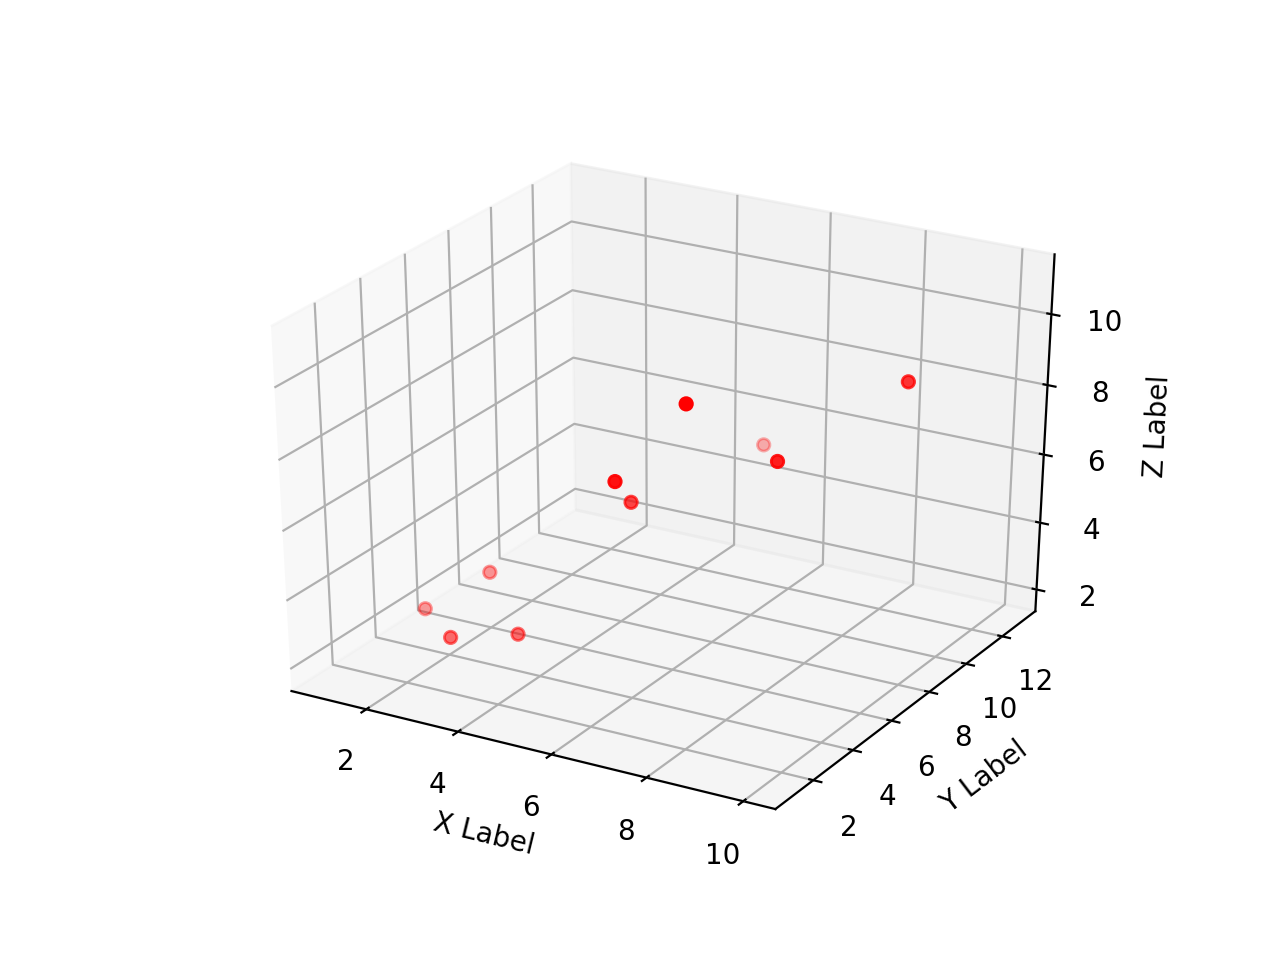

In [943]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [933]:
winter_df = test_cen["Winter"]

In [949]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 

%matplotlib inline  
%matplotlib notebook
%pylab
time = winter_df['time_of_day']
resolution = winter_df['resolution']
height = winter_df['Height']
trace1 = go.Scatter3d(
    x=time,
    y=resolution,
    z=height,
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.9
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data)

py.iplot(fig, filename='simple-3d-scatter')

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['time', 'scatter', 'mean']
`%matplotlib` prevents importing * from pylab and numpy



In [946]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='selee19', api_key='1IhNevlJpE6EC8CRtpmp')

time = winter_df['time_of_day']
resolution = winter_df['resolution']
height = winter_df['Height']
trace1 = go.Scatter3d(
    x=time,
    y=resolution,
    z=height,
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.9
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data)

py.iplot(fig, filename='simple-3d-scatter')

In [906]:
winter_df['resolution']

     clusters
2    0           2.484125
     1           1.051117
     2           2.033604
     3           1.350697
4    0           2.685348
     1           1.257541
     2           1.910299
     3           1.201843
7    0           1.416102
     1           2.858465
     2           1.417007
     3           2.770651
11   0           1.446255
     1           1.413212
     2           2.871699
     3           2.478204
13   0           1.367947
     1           3.017551
     2           1.455584
     3           1.214182
15   0           2.335714
     1           1.347437
     2           2.957016
     3           1.288915
17   0           1.998291
     1           1.294386
     2           1.127583
     3           1.000814
20   0           4.701385
     1           1.422521
                   ...   
191  2           1.197874
     3           2.500890
192  0           1.287688
     1           2.159587
     2           1.299935
     3           3.626692
194  0           1.09715

In [907]:
winter_df.head()

Height  time_of_day  resolution
  clusters                                   
2 0         2.484125     1.375000    0.594089
  1         1.051117     1.583333    1.137593
  2         2.033604     0.125000    0.594089
  3         1.350697     1.541667    0.594089
4 0         2.685348     1.083333    0.594089

In [942]:
Controid_results_s = test_cen.copy()

Winter


<IPython.core.display.Javascript object>


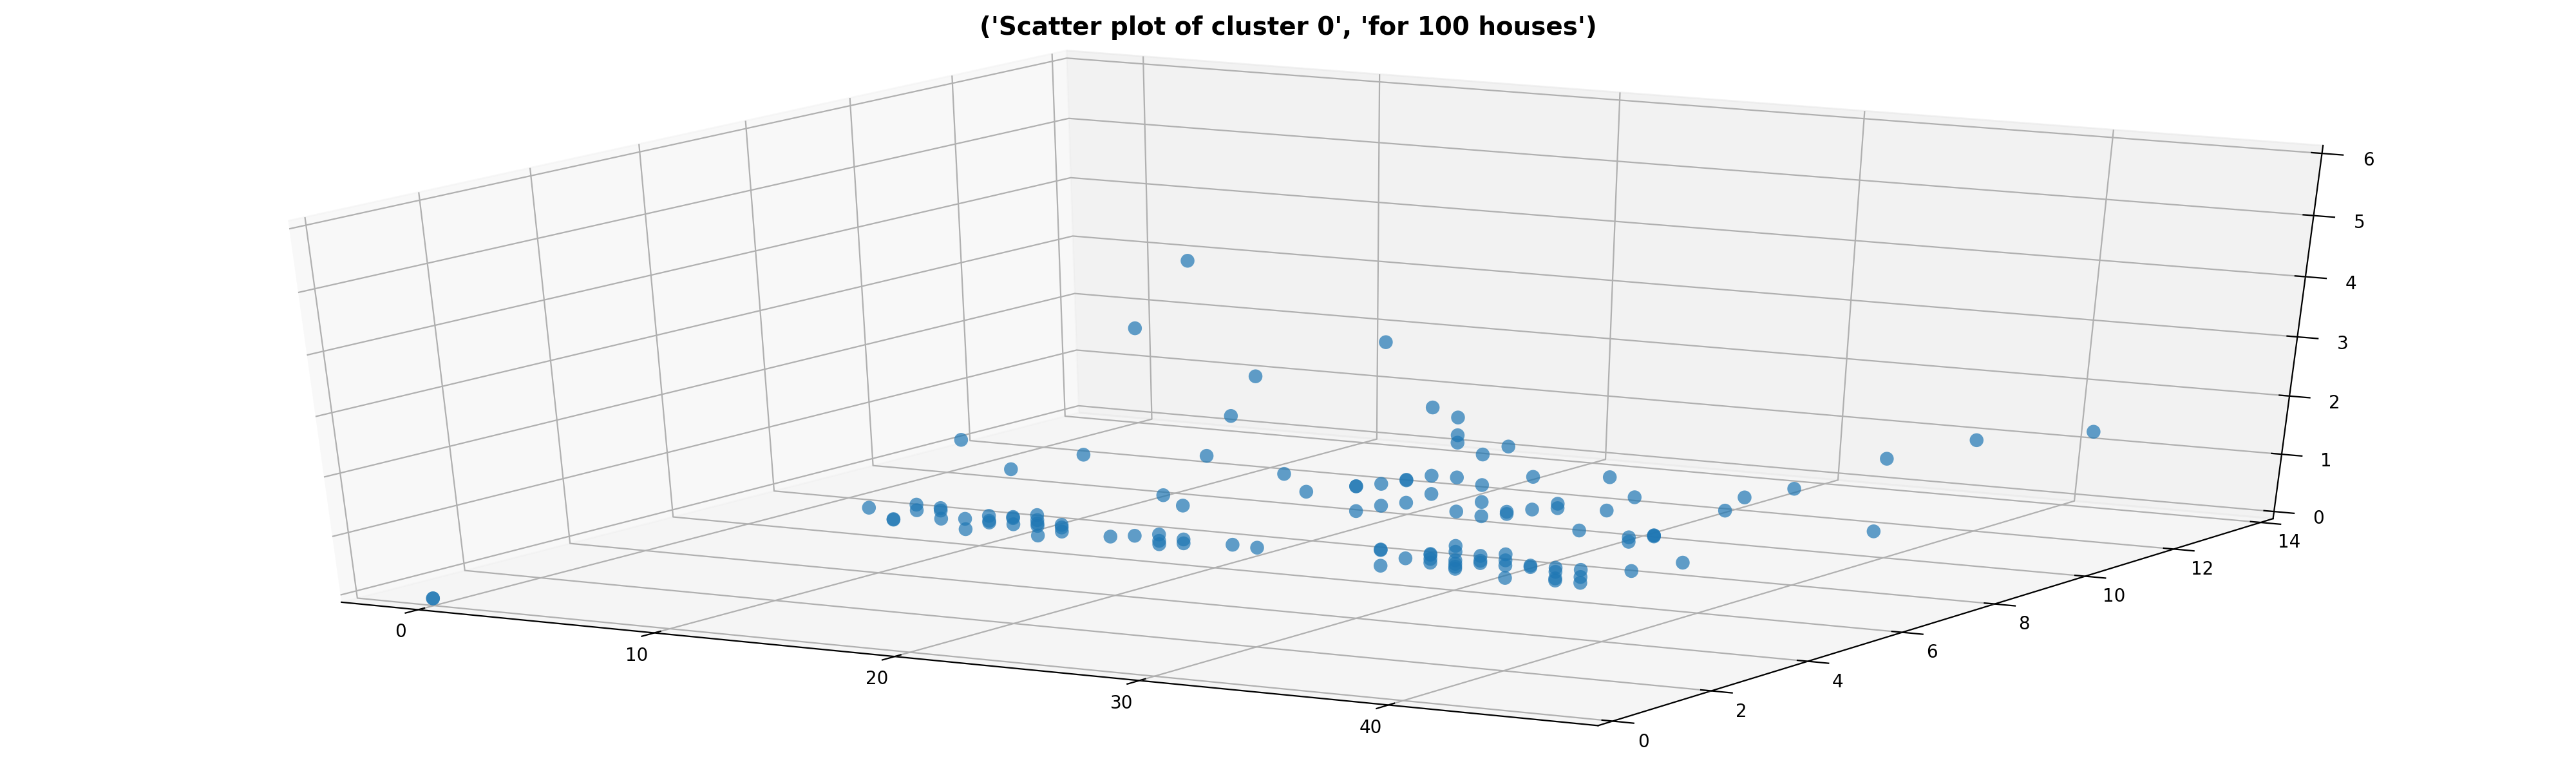

<IPython.core.display.Javascript object>


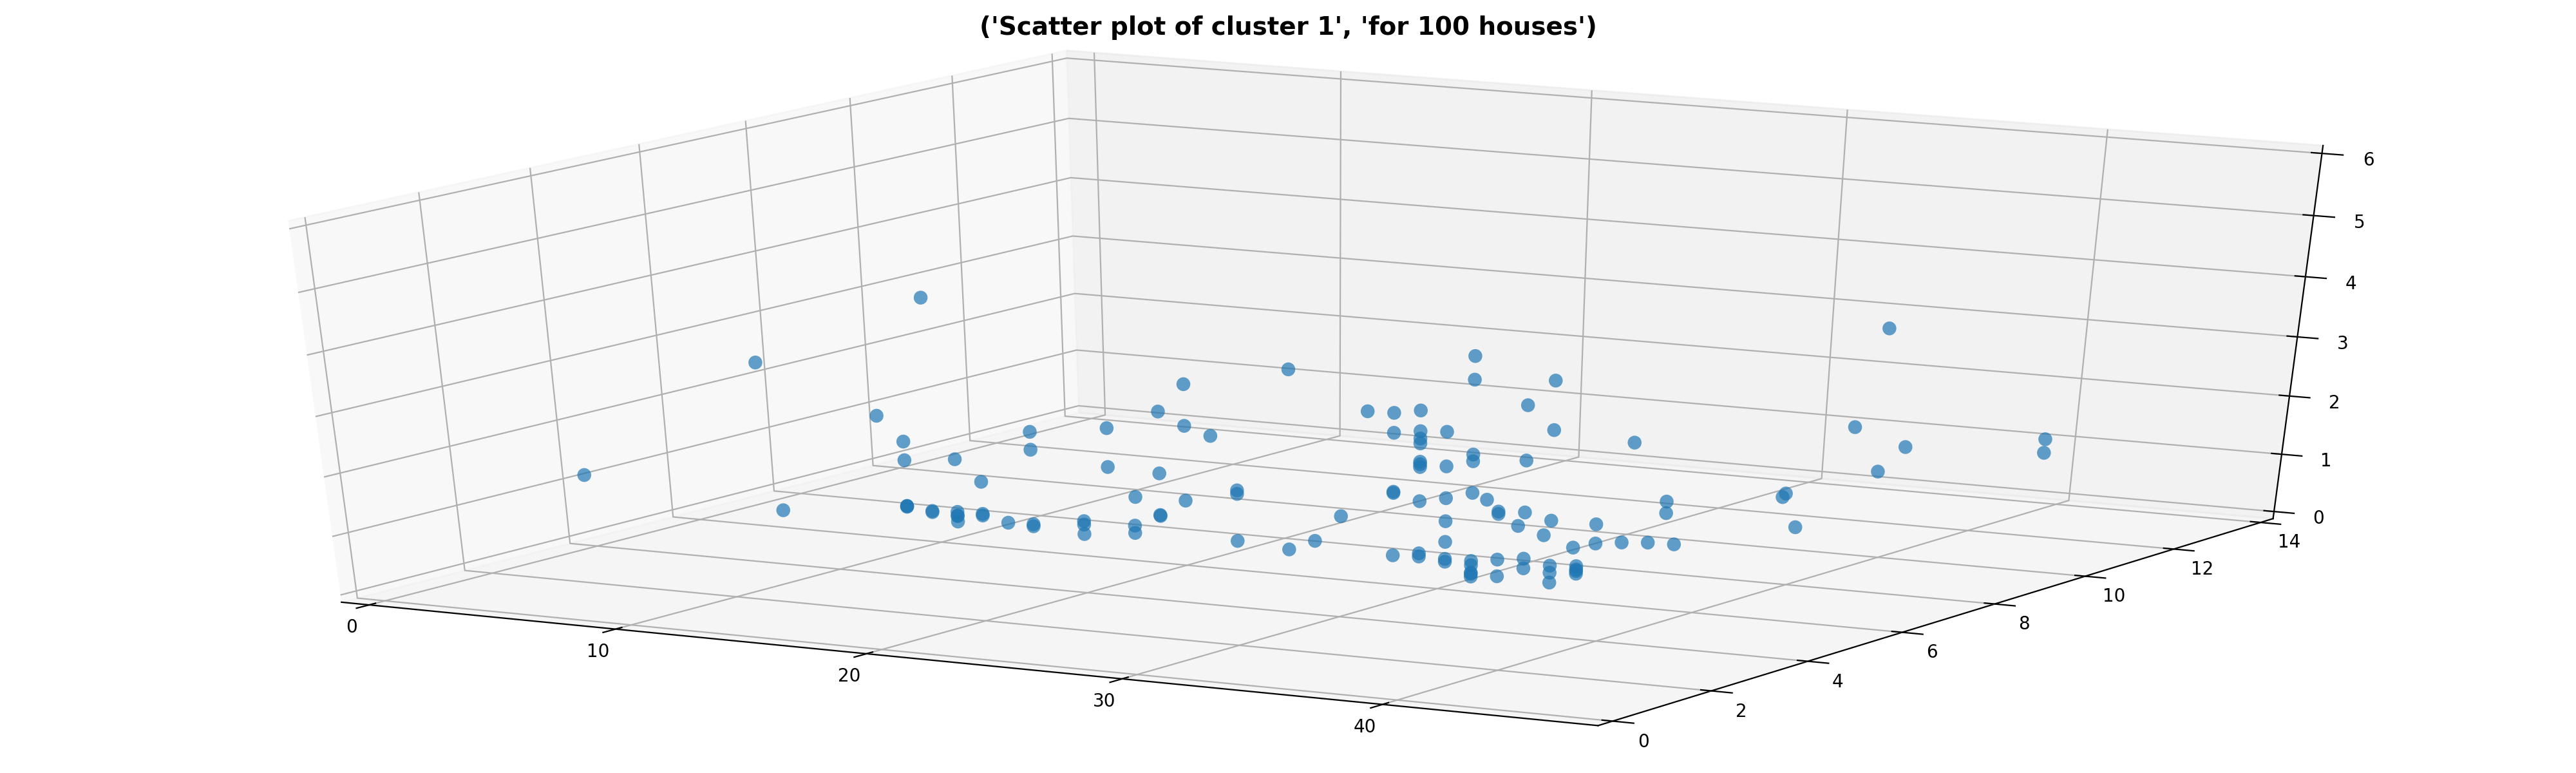

<IPython.core.display.Javascript object>


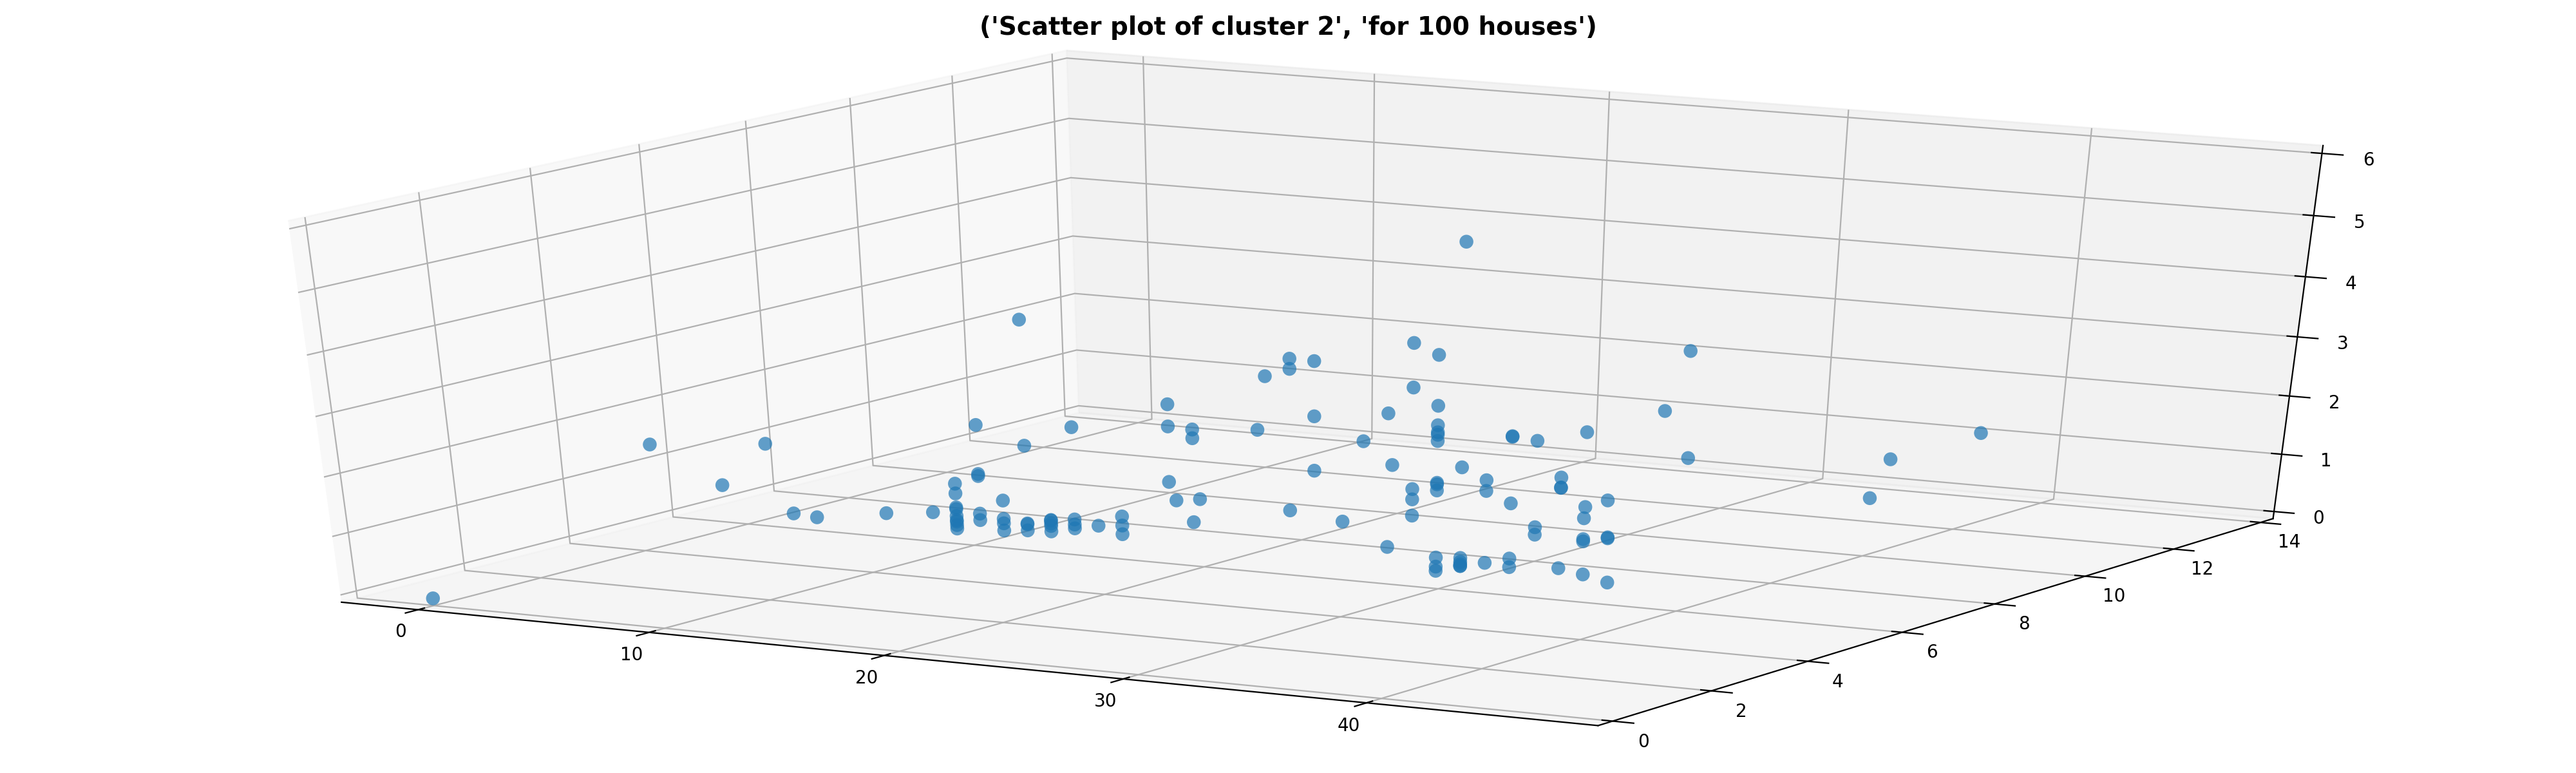

<IPython.core.display.Javascript object>


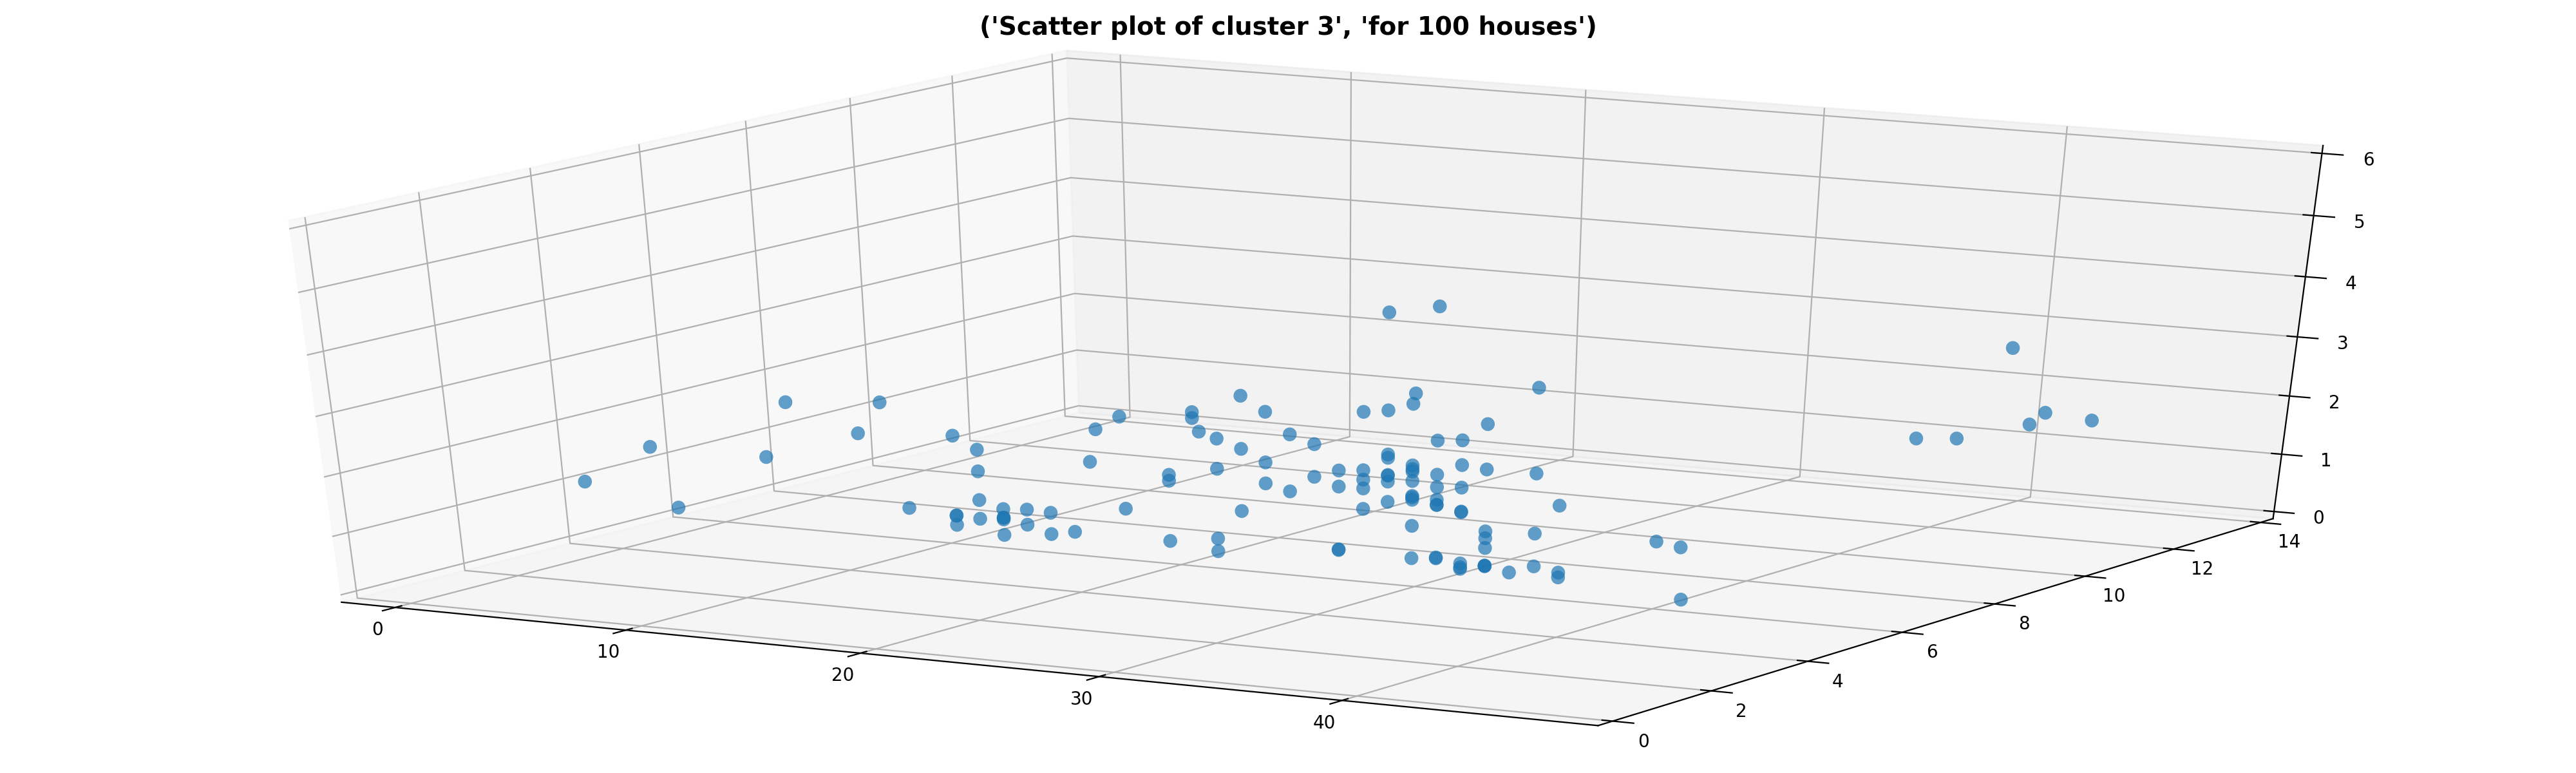

In [945]:
winter_df = Controid_results_s["Winter"]
print("Winter")
for i in range(4):
    median_3d(winter_df,i)

Spring


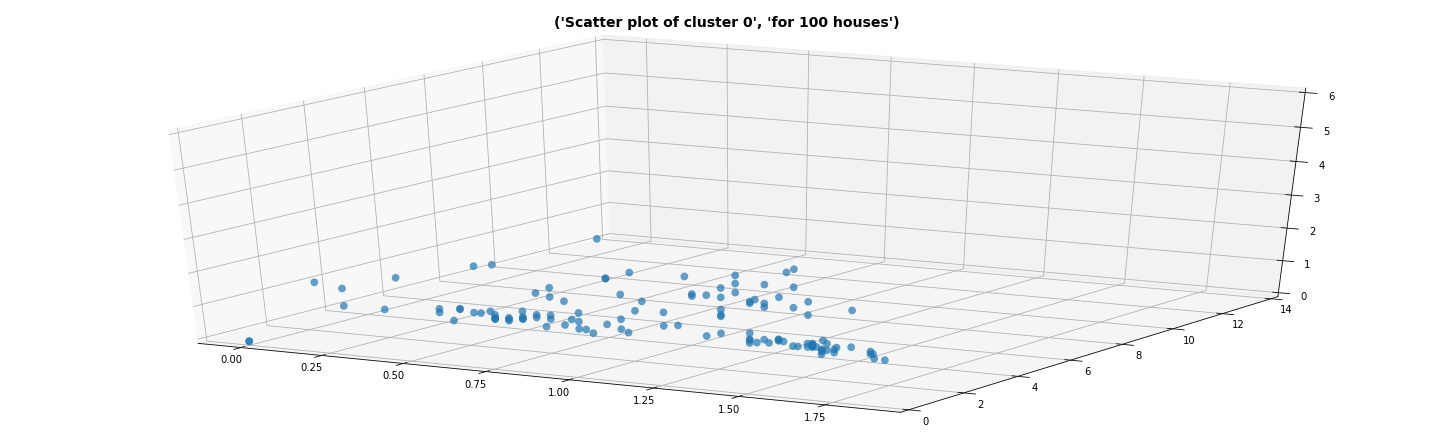

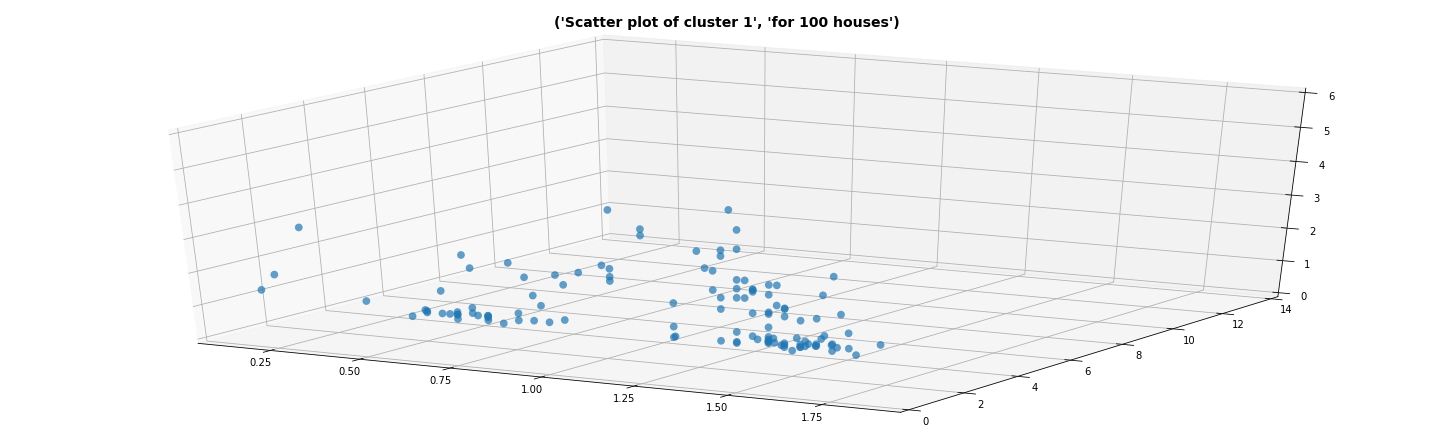

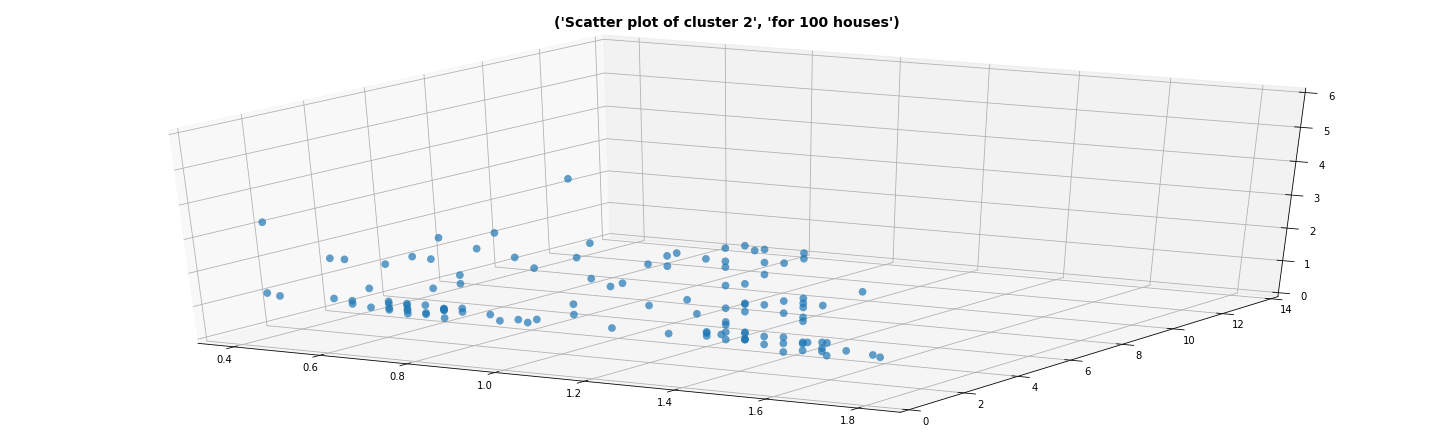

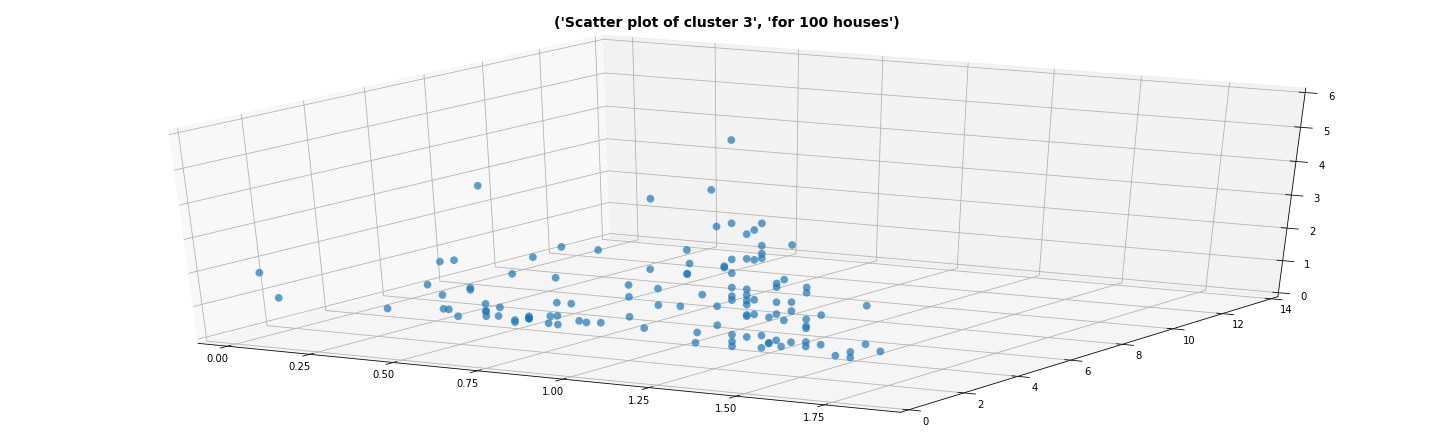

In [872]:
Spring_df = Controid_results_s["Spring"]
print("Spring")
for i in range(4):
    median_3d(Spring_df,i)

Summer


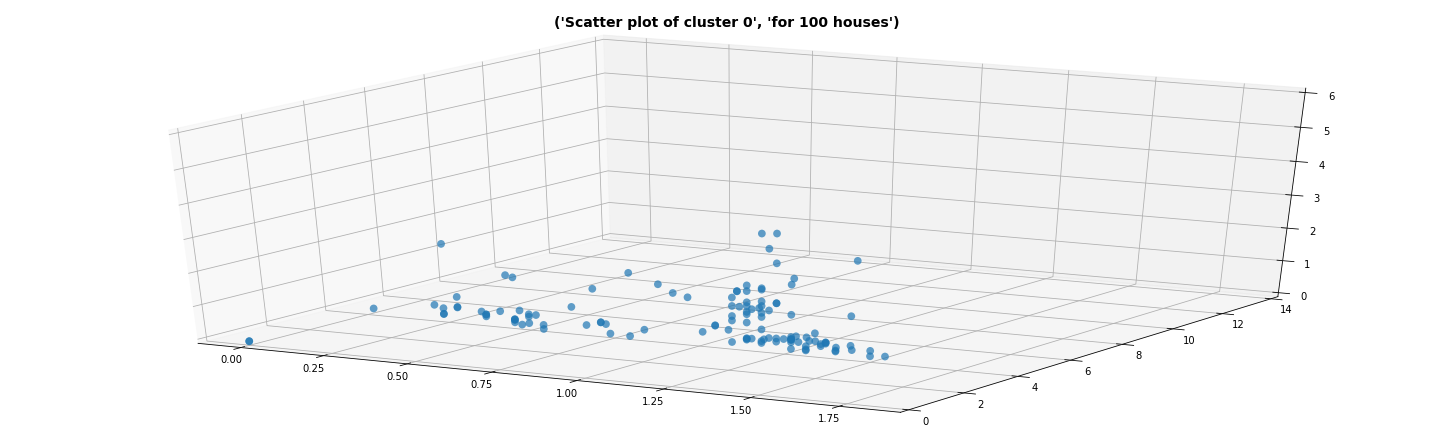

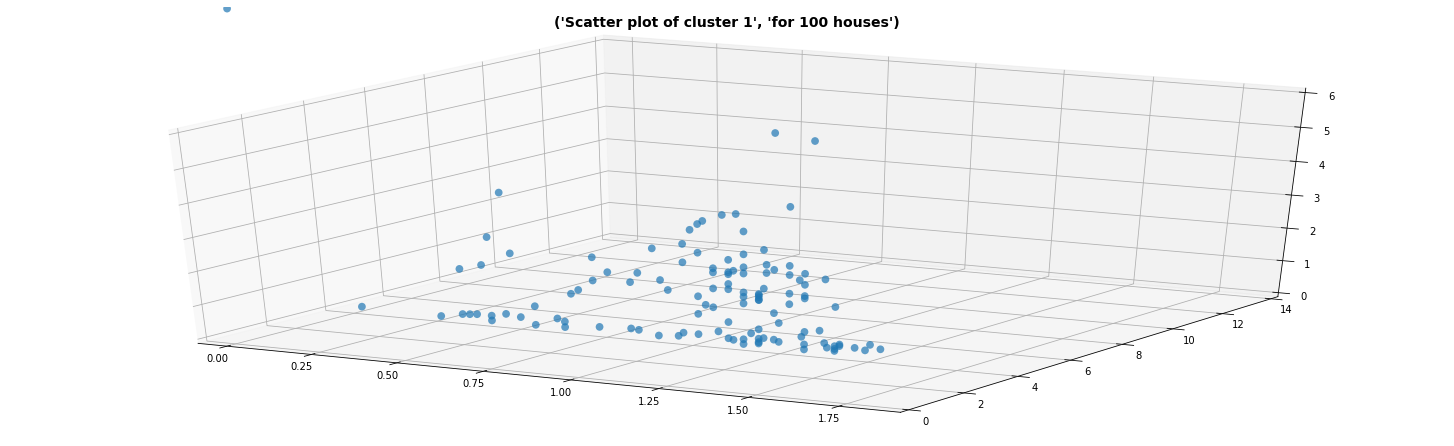

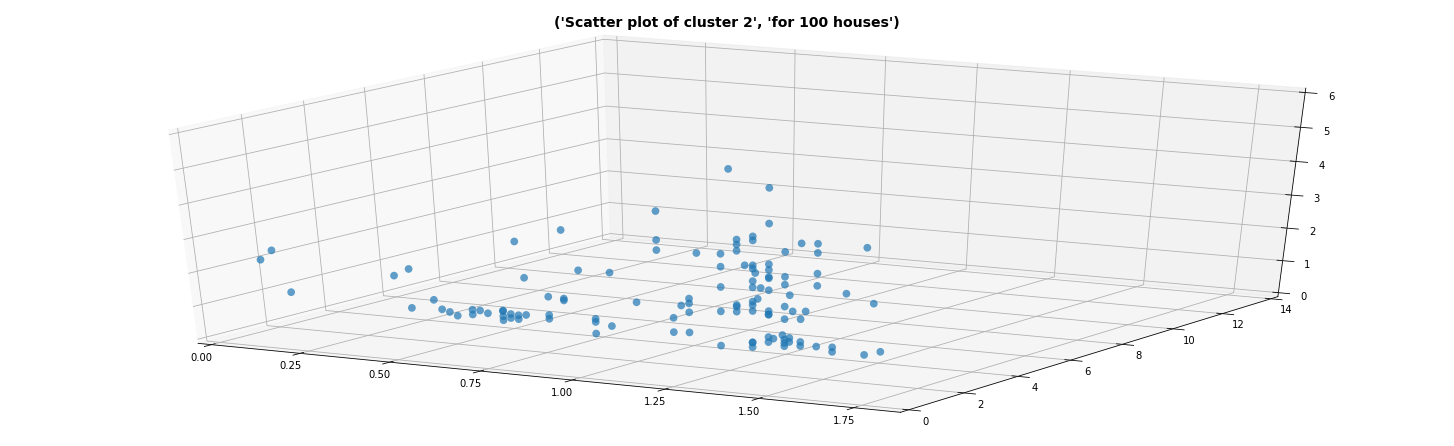

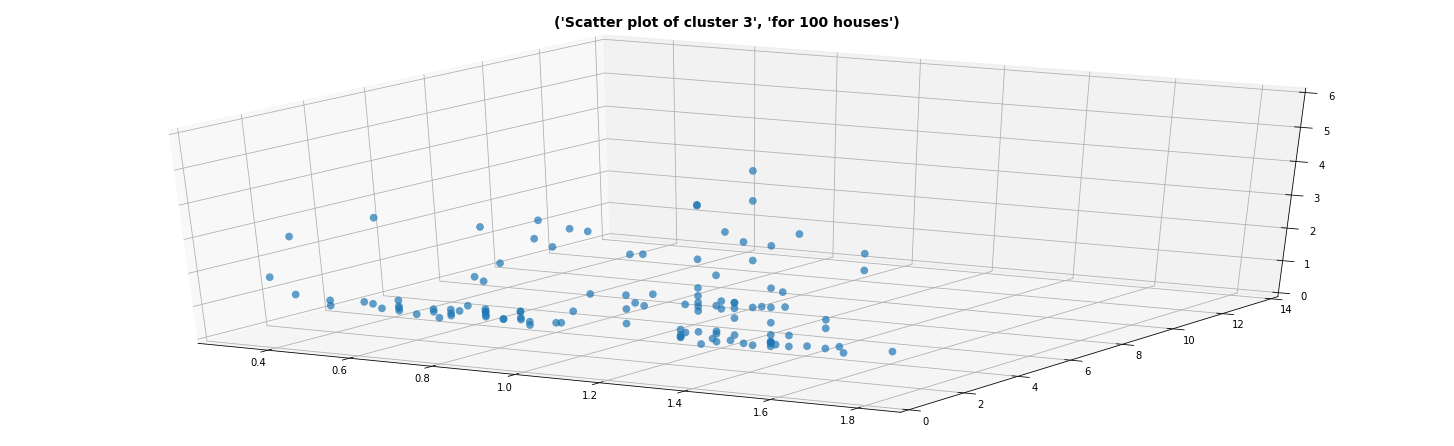

In [873]:
Summer_df = Controid_results_s["Summer"]
print("Summer")
for i in range(4):
    median_3d(Summer_df,i)

Autumn


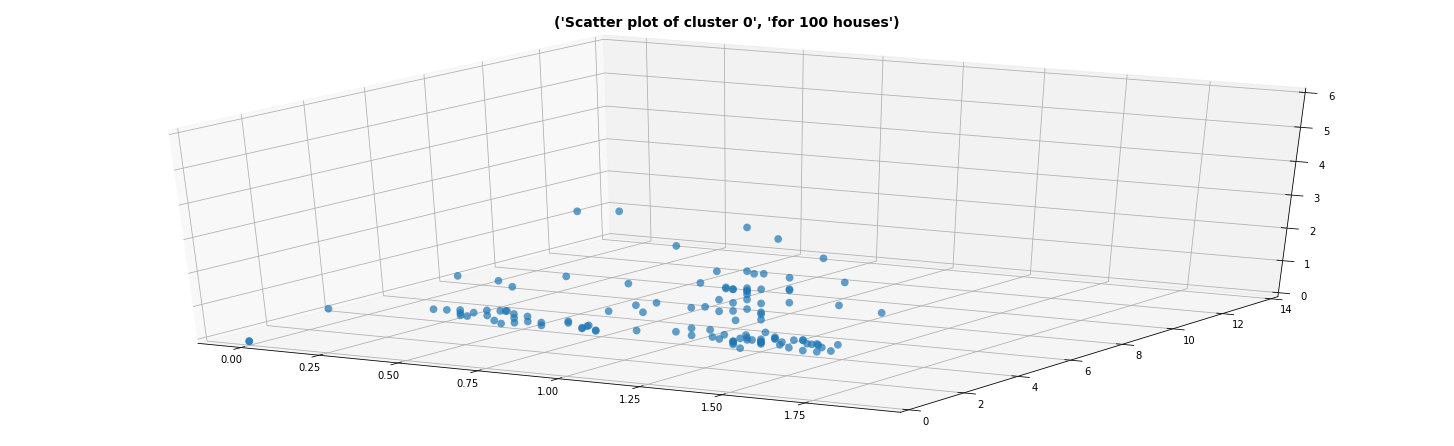

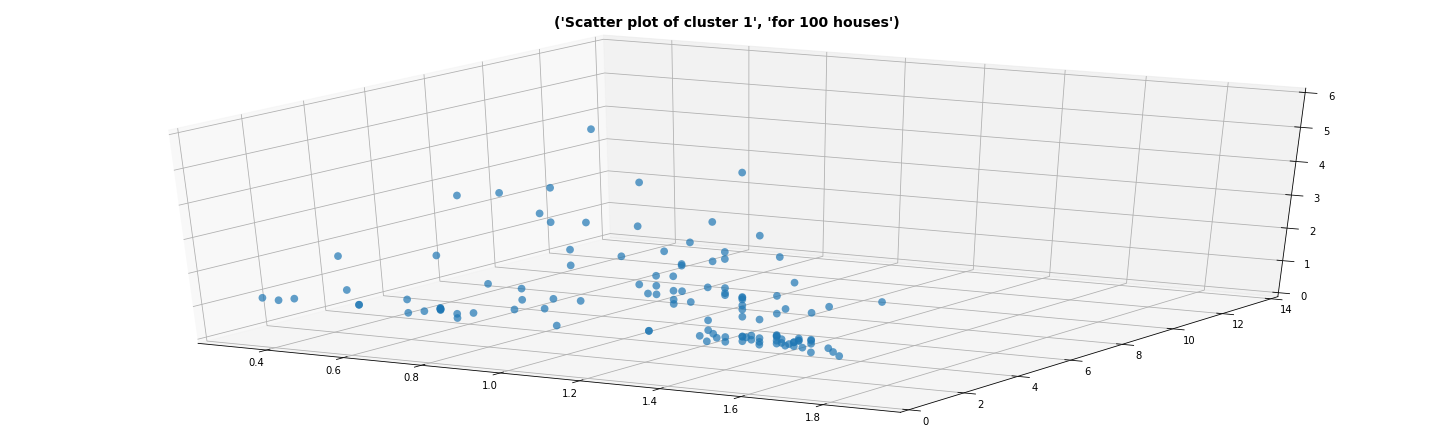

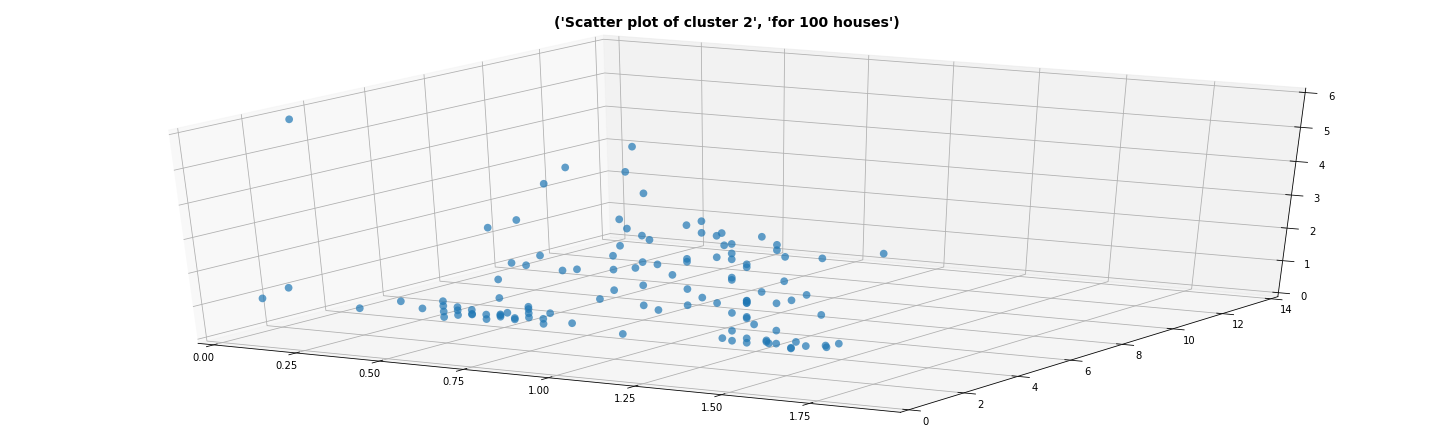

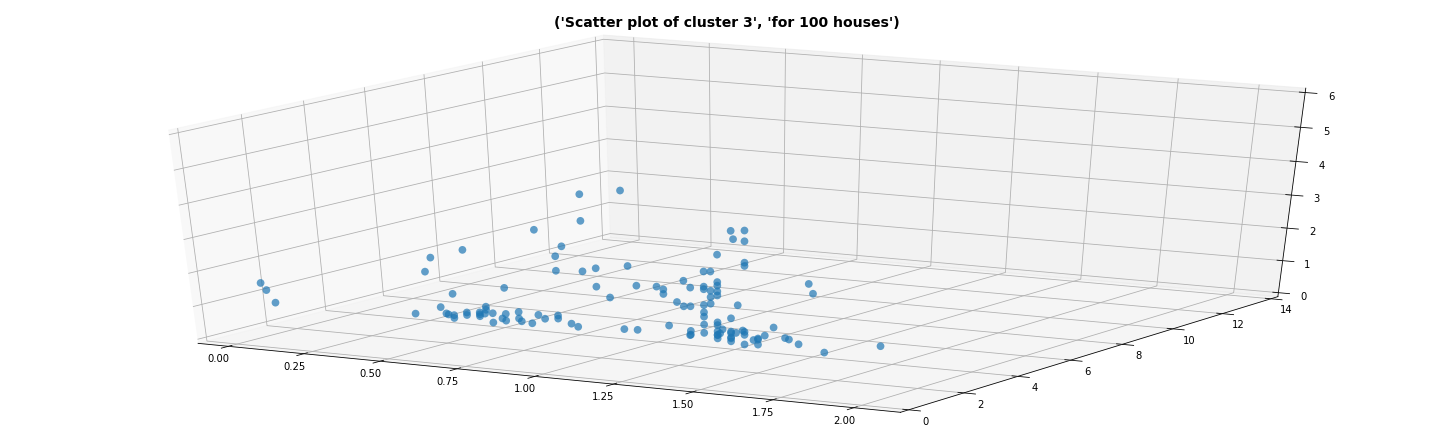

In [874]:
Autumn_df = Controid_results_s["Autumn"]
print("Autumn")
for i in range(4):
    median_3d(Autumn_df,i)

### By cluster

In [721]:
clust_0 = Controid_results_s.xs(0, level=1, drop_level=False)

In [795]:
clust_3 = test_cen.reset_index(level=0, drop=True).loc[3]

In [723]:
clust_0

Summer                           Autumn              \
                Height time_of_day resolution    Height time_of_day   
    clusters                                                          
2   0         2.157953    1.541667   0.594089  2.727198    1.500000   
4   0         1.290070    0.958333   0.594089  1.236748    0.875000   
7   0         2.546539    0.729167   0.594089  1.349021    0.583333   
11  0         1.481651    0.750000   0.766965  1.423856    0.750000   
13  0         3.198103    0.520833   0.907485  1.383149    0.625000   
15  0         1.253446    0.750000   0.594089  1.331365    1.604167   
17  0         1.266092    0.666667   0.594089  1.193910    1.000000   
20  0         1.263331    1.750000   0.766965  2.894726    1.625000   
21  0         1.050555    0.833333   0.594089  1.033233    1.479167   
22  0         1.182151    1.583333   0.594089  4.265661    1.583333   
23  0         1.412329    1.708333   0.594089  2.557506    1.770833   
25  0         1.492248    1.291667   1.028992  1.827125    1.187500   
26  0         1.305954    1.416667   0.594089  1.149665    1.625000   
27  0         2.500612    1.375000   0.594089  1.332656    1.416667   
28  0         1.313691    1.125000   0.594089  1.092089    0.750000   
29  0         1.353992    1.541667   0.594089  1.289655    1.333333   
30  0         1.505119    1.291667   1.028992  2.112584    1.458333   
32  0         2.848022    1.458333   0.594089  1.252017    1.541667   
33  0         1.230240    1.666667   0.594089  2.482889    1.500000   
34  0         3.600061    1.500000   0.594089  1.764687    1.083333   
39  0         2.277736    1.708333   0.594089  1.470243    0.750000   
41  0         1.377327    1.562500   0.594089  2.092104    1.541667   
43  0         1.452832    0.583333   0.594089  1.342274    0.666667   
44  0         1.172012    0.833333   0.594089  1.227465    0.833333   
45  0         1.582926    1.583333   0.907485  3.099455    1.750000   
46  0         3.994477    1.479167   0.594089  1.154192    0.791667   
47  0         1.235779    1.541667   1.236694  1.221108    1.458333   
49  0         1.084480    1.083333   0.594089  4.538958    1.500000   
50  0         1.961068    1.375000   0.594089  1.295553    0.791667   
58  0         1.120295    0.770833   0.594089  1.373356    1.708333   
...                ...         ...        ...       ...         ...   
161 0         2.689579    1.166667   0.594089  2.674051    0.958333   
163 0         2.013029    1.458333   0.594089  1.447552    0.708333   
164 0         1.330699    1.416667   0.594089  1.222675    0.625000   
166 0         1.188773    1.687500   0.907485  1.451348    1.666667   
167 0         2.648424    1.375000   0.766965  2.402385    1.416667   
168 0         1.340413    1.312500   1.236694  3.243902    1.541667   
169 0         1.352026    1.625000   0.766965  3.166531    1.395833   
170 0         1.182145    0.333333   0.594089  1.158553    1.041667   
171 0         1.103006    1.750000   0.766965  1.185385    1.625000   
172 0         1.365410    1.541667   1.137593  1.220457    0.645833   
174 0         2.807575    1.458333   0.594089  1.228142    1.708333   
175 0         2.213425    1.437500   0.766965  1.265959    1.166667   
176 0         2.255138    1.375000   0.594089  2.740217    1.500000   
178 0         2.454779    1.500000   0.594089  2.142343    1.229167   
180 0         1.145410    1.625000   1.137593  1.248933    1.666667   
181 0         1.766658    0.583333   0.594089  3.243872    1.520833   
182 0         1.248683    1.458333   0.594089  1.278588    1.541667   
183 0         2.640179    1.375000   0.766965  2.738330    1.458333   
185 0         1.203166    1.666667   0.594089  1.138686    1.666667   
186 0         2.054833    1.416667   0.594089  1.286636    1.270833   
187 0         1.322439    0.666667   0.594089  2.062702    1.416667   
189 0         1.347715    1.416667   0.594089  3.299418    1.500000   
191 0         1.648098    1.458333   0.5

In [807]:
clust_0_2.sort_values(by=['Height'])

ValueError: The column label 'Height' is not unique.

In [780]:
clust_0_2

Height  time_of_day  resolution    Height  time_of_day  \
clusters                                                             
0         2.157953         37.0         3.0  2.727198         36.0   
0         1.290070         23.0         3.0  1.236748         21.0   
0         2.546539         17.0         3.0  1.349021         14.0   
0         1.481651         18.0         5.0  1.423856         18.0   
0         3.198103         12.0         7.0  1.383149         15.0   
0         1.253446         18.0         3.0  1.331365         38.0   
0         1.266092         16.0         3.0  1.193910         24.0   
0         1.263331         42.0         5.0  2.894726         39.0   
0         1.050555         20.0         3.0  1.033233         35.0   
0         1.182151         38.0         3.0  4.265661         38.0   
0         1.412329         41.0         3.0  2.557506         42.0   
0         1.492248         31.0         9.0  1.827125         28.0   
0         1.305954         34.0         3.0  1.149665         39.0   
0         2.500612         33.0         3.0  1.332656         34.0   
0         1.313691         27.0         3.0  1.092089         18.0   
0         1.353992         37.0         3.0  1.289655         32.0   
0         1.505119         31.0         9.0  2.112584         35.0   
0         2.848022         35.0         3.0  1.252017         37.0   
0         1.230240         40.0         3.0  2.482889         36.0   
0         3.600061         36.0         3.0  1.764687         26.0   
0         2.277736         41.0         3.0  1.470243         18.0   
0         1.377327         37.0         3.0  2.092104         37.0   
0         1.452832         14.0         3.0  1.342274         16.0   
0         1.172012         20.0         3.0  1.227465         20.0   
0         1.582926         38.0         7.0  3.099455         42.0   
0         3.994477         35.0         3.0  1.154192         19.0   
0         1.235779         37.0        13.0  1.221108         35.0   
0         1.084480         26.0         3.0  4.538958         36.0   
0         1.961068         33.0         3.0  1.295553         19.0   
0         1.120295         18.0         3.0  1.373356         41.0   
...            ...          ...         ...       ...          ...   
0         2.689579         27.0         3.0  2.674051         23.0   
0         2.013029         35.0         3.0  1.447552         17.0   
0         1.330699         34.0         3.0  1.222675         15.0   
0         1.188773         40.0         7.0  1.451348         40.0   
0         2.648424         33.0         5.0  2.402385         34.0   
0         1.340413         31.0        13.0  3.243902         37.0   
0         1.352026         39.0         5.0  3.166531         33.0   
0         1.182145          8.0         3.0  1.158553         25.0   
0         1.103006         42.0         5.0  1.185385         39.0   
0         1.365410         37.0        11.0  1.220457         15.0   
0         2.807575         35.0         3.0  1.228142         41.0   
0         2.213425         34.0         5.0  1.265959         28.0   
0         2.255138         33.0         3.0  2.740217         36.0   
0         2.454779         36.0         3.0  2.142343         29.0   
0         1.145410         39.0        11.0  1.248933         40.0   
0         1.766658         14.0         3.0  3.243872         36.0   
0         1.248683         35.0         3.0  1.278588         37.0   
0         2.640179         33.0         5.0  2.738330         35.0   
0         1.203166         40.0         3.0  1.138686         40.0   
0         2.054833         34.0         3.0  1.286636         30.0   
0         1.322439         16.0         3.0  2.062702         34.0   
0         1.347715         34.0         3.0  3.299418         36.0   
0         1.648098         35.0         3.0  1.219114         34.0   
0         1.371060         15.0         4.0  1.292534         15.0   
0         2.380811    

Text(0.5, 0.98, 'Scatter plot of cluster 0 for 100 houses')

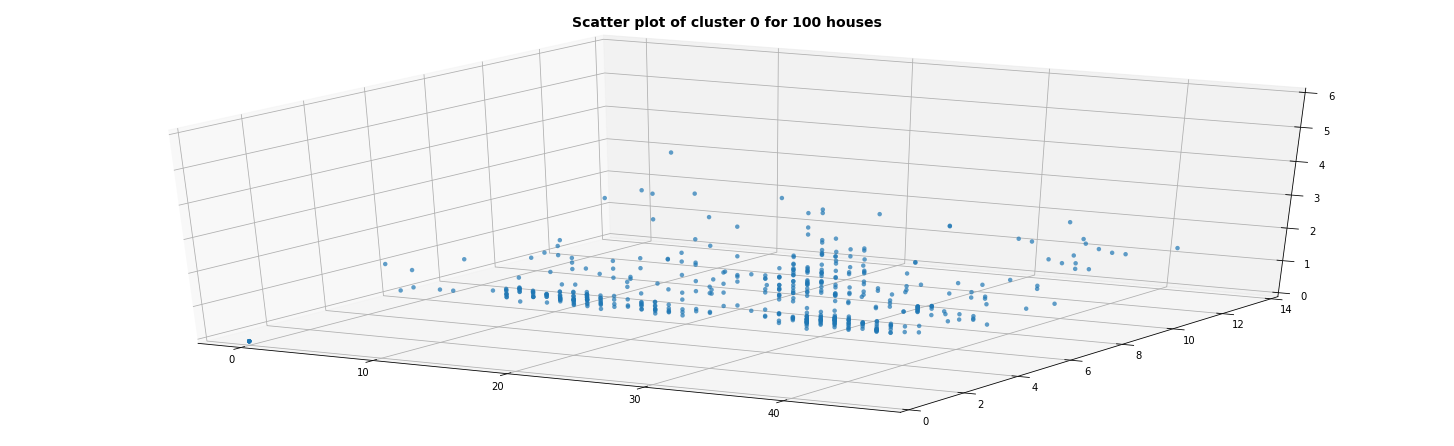

In [817]:
fig =plt.figure(figsize = (20,6)) 
df1=clust_0_2.copy()
ax = Axes3D(fig)
ax.scatter(df1['time_of_day'], df1['resolution'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
             edgecolor='k') # x,z,y
ax.set_ylim([0,14])
ax.set_zlim([0,6])
plt.suptitle(("Scatter plot of cluster 0 for 100 houses"),
                fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Scatter plot of cluster 1 for 100 houses')

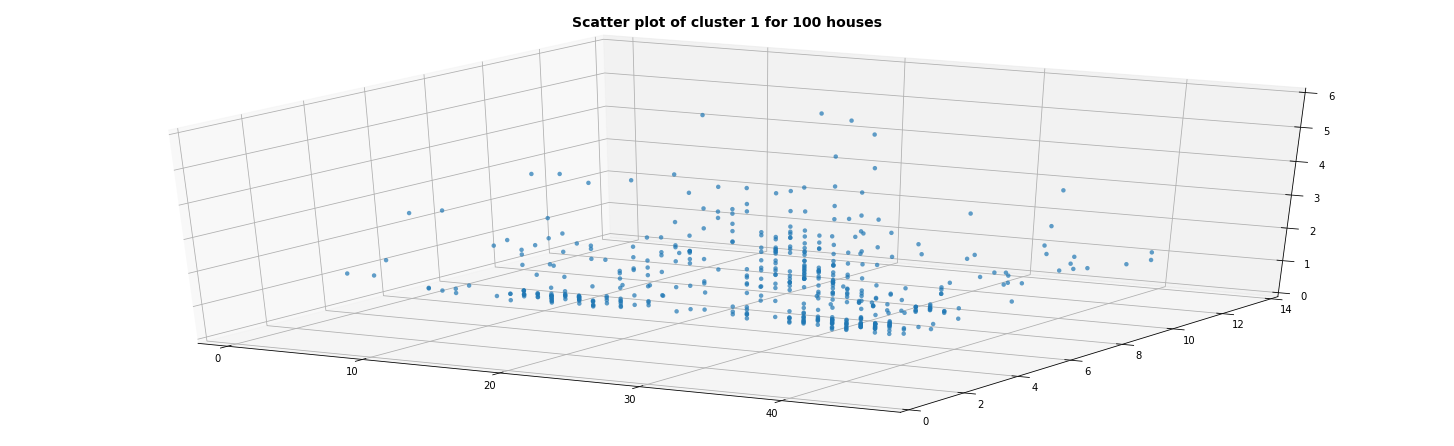

In [816]:
fig =plt.figure(figsize = (20,6)) 
df1=clust_1_2.copy()
ax = Axes3D(fig)
ax.scatter(df1['time_of_day'], df1['resolution'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
             edgecolor='k') # x,z,y
ax.set_ylim([0,14])
ax.set_zlim([0,6])
plt.suptitle(("Scatter plot of cluster 1 for 100 houses"),
                fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Scatter plot of cluster 0 for 100 houses')

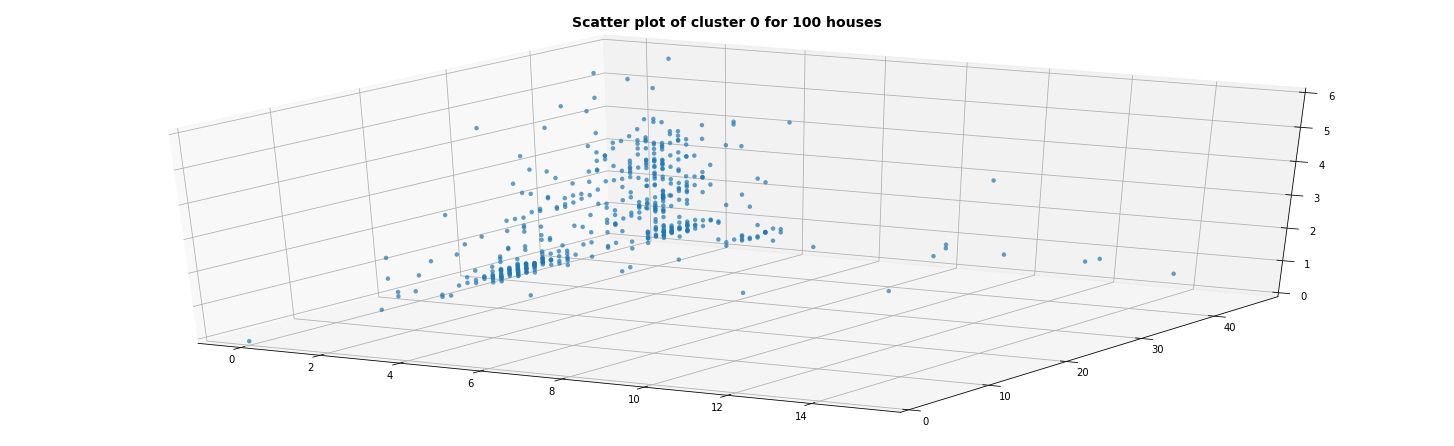

In [815]:
fig =plt.figure(figsize = (20,6)) 
df1=clust_2_2.copy()
ax = Axes3D(fig)
ax.scatter(df1['resolution'], df1['time_of_day'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
             edgecolor='k') # x,z,y
ax.set_ylim([0,48])
ax.set_zlim([0,6])
plt.suptitle(("Scatter plot of cluster 0 for 100 houses"),
                fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Scatter plot of cluster 2 for 100 houses')

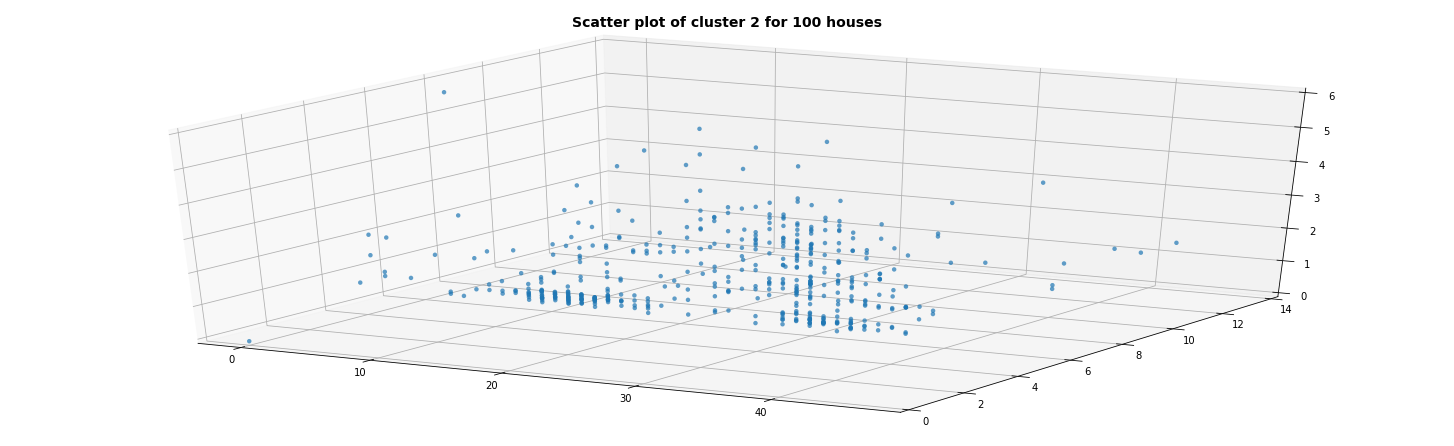

In [814]:
fig =plt.figure(figsize = (20,6)) 
df1=clust_2_2.copy()
ax = Axes3D(fig)
ax.scatter(df1['time_of_day'], df1['resolution'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
             edgecolor='k') # x,z,y
ax.set_ylim([0,14])
ax.set_zlim([0,6])
plt.suptitle(("Scatter plot of cluster 2 for 100 houses"),
                fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Scatter plot of cluster 3 for 100 houseswith n_clusters = 0')

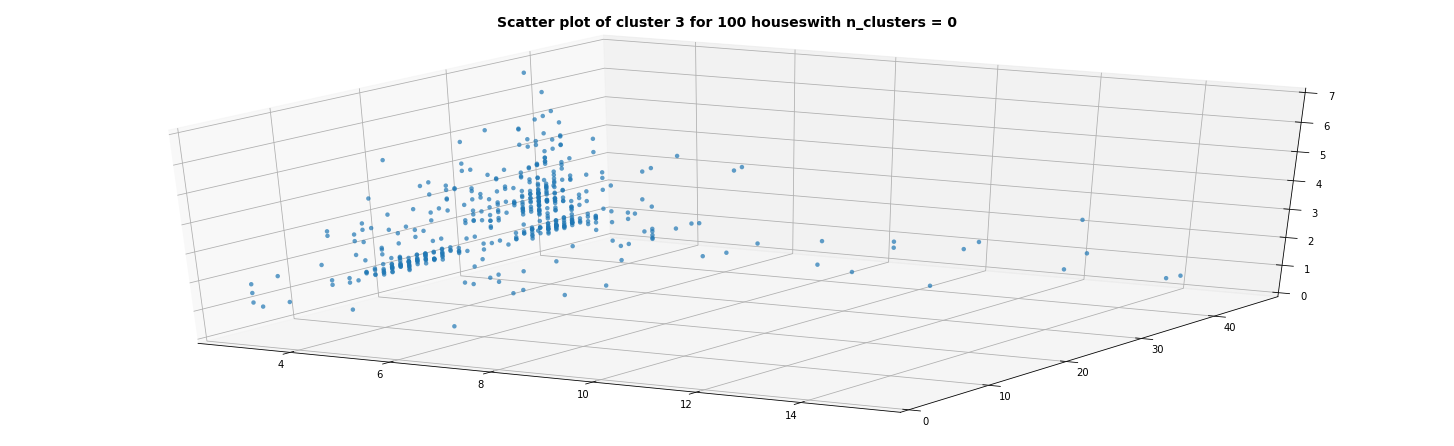

In [811]:
fig =plt.figure(figsize = (20,6)) 
df1=clust_3.copy()
ax = Axes3D(fig)
ax.scatter(df1['resolution'], df1['time_of_day'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
             edgecolor='k') # x,z,y
ax.set_ylim([0,48])
ax.set_zlim([0,7])
plt.suptitle(("Scatter plot of cluster 3 for 100 houses"
                  "with n_clusters = %d" % n),
                fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Scatter plot of cluster 3 for 100 houses')

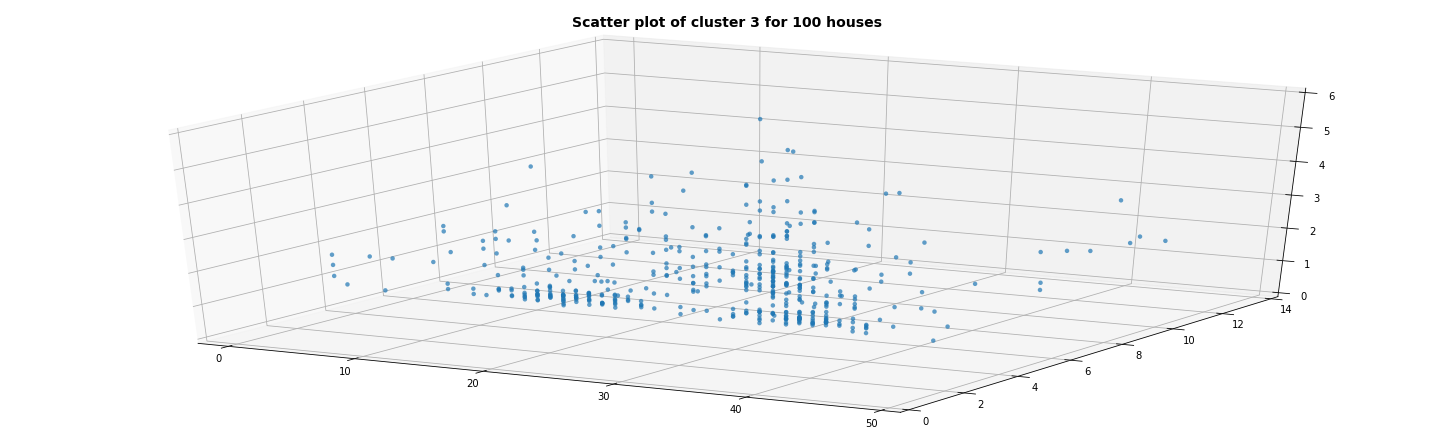

In [813]:
fig =plt.figure(figsize = (20,6)) 
df1=clust_3.copy()
ax = Axes3D(fig)
ax.scatter(df1['time_of_day'], df1['resolution'], df1['Height'],marker='o', s=20, lw=0, alpha=0.7,
             edgecolor='k') # x,z,y
ax.set_ylim([0,14])
ax.set_zlim([0,6])
plt.suptitle(("Scatter plot of cluster 3 for 100 houses"),
                fontsize=14, fontweight='bold')

In [700]:
Controid_results_s

Summer                           Autumn              \
                Height time_of_day resolution    Height time_of_day   
    clusters                                                          
2   0         2.157953    1.541667   0.594089  2.727198    1.500000   
    1         3.708550    1.166667   0.594089  1.214190    1.541667   
    2         1.237717    1.416667   0.594089  3.495576    1.500000   
    3         5.291355    1.500000   0.594089  1.735162    1.500000   
4   0         1.290070    0.958333   0.594089  1.236748    0.875000   
    1         2.883686    1.375000   0.594089  3.336634    1.395833   
    2         2.067148    1.333333   0.594089  2.100363    1.083333   
    3         1.185152    1.395833   0.766965  1.409548    1.416667   
7   0         2.546539    0.729167   0.594089  1.349021    0.583333   
    1         1.318028    1.666667   0.766965  2.667289    1.625000   
    2         2.698723    1.729167   0.594089  1.295988    1.708333   
    3         1.356608    0.583333   0.594089  2.431940    0.583333   
11  0         1.481651    0.750000   0.766965  1.423856    0.750000   
    1         2.765045    1.541667   0.594089  1.331384    1.458333   
    2         1.354843    1.458333   0.766965  2.922203    0.833333   
    3         2.415710    0.854167   0.594089  2.666134    1.458333   
13  0         3.198103    0.520833   0.907485  1.383149    0.625000   
    1         9.350302    0.041667   0.594089  1.359438    1.666667   
    2         1.318849    1.750000   0.594089  6.425119    0.208333   
    3         1.534430    0.833333   0.594089  2.865095    1.083333   
15  0         1.253446    0.750000   0.594089  1.331365    1.604167   
    1         1.274991    1.666667   0.594089  2.656691    0.541667   
    2         2.467080    0.500000   0.594089  1.459409    0.625000   
    3         2.358685    1.458333   0.594089  2.522086    1.500000   
17  0         1.266092    0.666667   0.594089  1.193910    1.000000   
    1         1.217252    1.666667   0.594089  1.279660    1.750000   
    2         1.061834    1.000000   0.594089  1.853529    0.791667   
    3         1.878475    1.208333   0.594089  1.075178    0.083333   
20  0         1.263331    1.750000   0.766965  2.894726    1.625000   
    1         5.215312    1.541667   0.594089  1.371908    1.666667   
...                ...         ...        ...       ...         ...   
191 2         1.384237    1.458333   1.083292  3.396960    1.125000   
    3         1.239110    0.916667   0.594089  1.290675    1.250000   
192 0         1.371060    0.645833   0.680527  1.292534    0.625000   
    1         2.502266    1.458333   0.594089  1.272432    1.625000   
    2         3.553304    0.791667   0.594089  3.213541    0.916667   
    3         1.183919    1.541667   0.766965  1.847222    0.666667   
194 0         2.380811    0.979167   0.594089  1.285629    1.020833   
    1         1.336398    1.250000   0.594089  4.905297    0.958333   
    2         4.171613    1.375000   0.594089  3.263109    1.250000   
    3         1.192118    1.312500   1.072090  2.221623    1.375000   
195 0         1.262788    0.750000   0.594089  1.323254    1.479167   
    1         2.501699    1.666667   0.594089  3.094329    1.666667   
    2         1.443186    1.458333   0.594089  1.297279    0.833333   
    3         3.878562    0.625000   0.594089  1.307448    1.687500   
196 0         2.402052    1.416667   0.594089  1.366317    1.625000   
    1         1.363766    1.666667   0.766965  2.521422    1.541667   
    2         4.188944    1.416667   0.594089  1.255613    0.833333   
    3         1.301925    0.875000   0.594089  3.695464    1.500000   
197 0         1.414808    1.291667   0.594089  2.817421    1.541667   
    1         3.297694    1.479167   0.594089  1.358984    0.791667   
    2         2.164494    1.416667   0.594089  1.527741    1.458333   
    3         6.114390    1.500000   0.594089  3.535247    1.020833   
198 0         1.183308    0.791667   0.5

In [429]:
Winter = Controid_results_s['Winter']

In [693]:
Spring = Controid_results_s['Spring']

In [453]:
Spring.at[2,'Height']

ValueError: At based indexing on an non-integer index can only have non-integer indexers

In [451]:
Spring

Height  time_of_day  resolution
    clusters                                   
2   0         1.090672     1.763889    0.768414
    1         1.295448     0.859195    0.616818
    2         3.509329     1.354167    0.594089
    3         1.120555     0.104167    0.860885
4   0         2.185657     1.175926    0.645331
    1         1.276957     0.708882    0.744398
    2         2.970156     1.026316    0.663473
    3         1.394924     1.341435    0.672385
7   0         1.459985     1.665278    0.784520
    1         2.857440     0.698529    0.651297
    2         2.766319     1.583333    1.059899
    3         1.516687     0.741007    0.718368
11  0         3.246701     1.597222    0.605614
    1         2.612138     0.913194    0.622901
    2         1.363681     1.492857    0.730511
    3         1.483550     0.798044    0.655089
13  0         2.767050     1.650000    0.663239
    1         1.537529     1.061198    0.618484
    2         1.738318     0.304924    0.631908
    3         1.326082     1.675858    0.681104
15  0         1.345332     1.605856    0.790358
    1         1.570175     0.717647    0.657137
    2         3.244325     0.743056    0.594089
    3         2.533643     1.473039    0.614427
17  0         1.079853     1.648810    0.594089
    1         1.113664     0.531250    0.594089
    2         1.738074     1.298611    0.594089
    3         1.219371     0.948718    0.594089
20  0         2.166990     1.556911    0.652463
    1         1.320497     0.658935    0.688136
...                ...          ...         ...
191 2         1.412985     0.854167    0.619512
    3         1.412802     1.452932    0.660314
192 0         1.383069     0.634857    0.715005
    1         1.361918     1.591165    0.763628
    2         3.135026     1.541667    0.594089
    3         2.719277     0.777778    0.594089
194 0         1.808326     1.364035    0.656077
    1         1.274867     1.148438    0.657672
    2         3.529197     1.423611    0.594089
    3         2.656061     0.991667    0.594089
195 0         1.134262     1.583333    0.594089
    1         1.053270     0.625000    0.594089
    2         3.316599     1.375000    0.594089
    3         1.823745     1.625000    0.594089
196 0         2.722859     1.503086    0.715666
    1         1.453807     1.644814    0.800207
    2         3.318442     0.886364    0.638295
    3         1.500858     0.887972    0.679768
197 0         2.451910     1.395833    0.633348
    1         1.480128     1.483173    0.698699
    2         3.890903     1.453125    0.594089
    3         1.547724     0.825893    0.647789
198 0         1.337376     1.041667    0.594089
    1         1.190018     1.701667    0.751234
    2         1.312974     0.673611    0.610298
    3         2.861524     1.491667    0.594089
199 0         2.358987     0.833333    0.594089
    1         1.221096     1.460526    0.626077
    2         3.323202     1.635417    0.594089
    3         1.210641     0.701667    0.601004

[483 rows x 3 columns]

In [424]:
def mean_centroid(df):
    height = np.mean(df["Height"])
    time_of_day = np.mean(df["time_of_day"])
    resolution = np.mean(df["resolution"])
    
    return height,time_of_day,resolution

In [427]:
mean_centroid(Summer)

(2.2199843542332798, 1.223034912329027, 0.683677821117338)

In [430]:
mean_centroid(Winter)

(2.0948491025507714, 1.235479903456459, 0.6949168248698205)

In [425]:
mean_centroid(Autumn)

(2.221024616408838, 1.2421688291897148, 0.6902975385544053)

In [432]:
mean_centroid(Spring)

(2.0935386718387488, 1.2201185353913595, 0.6702407582062024)

In [411]:
Autumn.iloc[:,0]

     clusters
2    0           2.475924
     1           1.290719
     2           3.498153
     3           1.417070
4    0           1.386690
     1           3.500653
     2           1.291831
     3           2.154333
7    0           1.418313
     1           2.561294
     2           1.384297
     3           2.954539
11   0           1.498365
     1           1.394898
     2           3.114624
     3           2.854731
13   0           1.433549
     1           1.494226
     2           7.650153
     3           3.232031
15   0           2.384497
     1           1.375376
     2           3.149025
     3           1.485261
17   0           1.150664
     1           1.451579
     2           1.000000
     3           1.670762
20   0           2.895762
     1           1.427278
                   ...   
191  2           3.553552
     3           1.442773
192  0           1.343996
     1           1.376657
     2           1.966822
     3           3.483747
194  0           1.37732

In [406]:
time_of_days.iloc[:,0]

     clusters
2    0           1.550000
     1           1.208333
     2           1.497807
     3           0.932692
4    0           1.379167
     1           1.104710
     2           1.484375
     3           1.236111
7    0           0.761364
     1           1.663302
     2           1.695312
     3           0.645215
11   0           0.705939
     1           1.472531
     2           0.899510
     3           1.578704
13   0           0.770833
     1           0.041667
     2           1.621970
     3           0.724359
15   0           0.613636
     1           1.573087
     2           1.012500
     3           1.063776
17   0           0.611979
     1           1.631579
     2           1.018229
     3           1.180556
20   0           1.705163
     1           1.473214
                   ...   
191  2           1.050000
     3           1.260913
192  0           0.665404
     1           1.564236
     2           0.922619
     3           1.429825
194  0           1.01851

In [389]:
for i in x:
    print(i)

2.2199843542332798
2.221024616408838
2.0948491025507714
2.0935386718387488


In [419]:
np.mean(Controid_results['Height'])

Height    2.219984
Height    2.221025
Height    2.094849
Height    2.093539
dtype: float64

In [420]:
np.mean(Controid_results['time_of_day'])

time_of_day    1.223035
time_of_day    1.242169
time_of_day    1.235480
time_of_day    1.220119
dtype: float64

In [421]:
np.mean(Controid_results['resolution'])

resolution    0.683678
resolution    0.690298
resolution    0.694917
resolution    0.670241
dtype: float64

appended_data = []
for infile in glob.glob("*.xlsx"):
    data = pandas.read_excel(infile)
    # store DataFrame in list
    appended_data.append(data)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data, axis=1)
# write DataFrame to an excel sheet 
appended_data.to_excel('appended.xlsx')

In [342]:
houses_array = [73]
Controid_results = []
for i in houses_array:
    #colormap_house(i)
    c = seasonal_spike_3d(i,4)
    Controid_results.append(c)

In [343]:
Controid_results = pd.concat(Controid_results, axis=0)

## 2D scatter plots

In [48]:
def seasonal_spike_2d(house_num,n):
    print("HOUSE NO: ", house_num)
    house_array = extract_house2(house_num)
    df = data_format(house_array)
    december = df.iloc[:,334:]
    Jan_Fe = df.iloc[:,:59]
    Summer_df = pd.concat([december, Jan_Fe], axis=1, sort=False)
    Autumn_df = df.iloc[:,59:151]
    Winter_df = df.iloc[:,151:243]
    Spring_df = df.iloc[:,243:334]
    
    Summer_shaped_array = reshaping(Summer_df)
    summer_pos = show_pos(Summer_shaped_array)
    summer_spike_df,sum_spike = Generate_clustering_features(summer_pos,1)

    Autumn_shaped_array = reshaping(Autumn_df)
    Autumn_pos = show_pos(Autumn_shaped_array)
    Autumn_spike_df,sum_spike = Generate_clustering_features(Autumn_pos,1)

    Winter_shaped_array = reshaping(Winter_df)
    Winter_pos = show_pos(Winter_shaped_array)
    Winter_spike_df,sum_spike = Generate_clustering_features(Winter_pos,1)

    Spring_shaped_array = reshaping(Spring_df)
    Spring_pos = show_pos(Spring_shaped_array)
    Spring_spike_df,sum_spike = Generate_clustering_features(Spring_pos,1)
    
    seasons = [summer_spike_df,Autumn_spike_df,Winter_spike_df,Spring_spike_df]
    print("Summer")
    GMM_2d_scatter(summer_spike_df,n)
    print("Autumn")
    GMM_2d_scatter(Autumn_spike_df,n)
    print("Winter")
    GMM_2d_scatter(Winter_spike_df,n)
    print("Spring")
    GMM_2d_scatter(Spring_spike_df,n)

In [58]:
def GMM_2d_scatter(Nm_df_G,n):
    X = Nm_df_G.copy()
    gmm = GMM(n_components=n,covariance_type='tied',random_state=42).fit(X)
    labels = gmm.predict(X)
    clmns = ['Height', 'time_of_day','resolution']

    #Glue back to originaal data
    X['clusters'] = labels

    #Add the column into our list
    clmns.extend(['clusters'])
    #print (df[clmns].groupby(['clusters']).mean())

    sns.lmplot('time_of_day', 'Height',
           data=X, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 40,
                       "cmap":'viridis'})
    plt.title('time_of_day vs Height')
    plt.xlabel('time_of_day')
    plt.ylabel('Height')

In [ ]:
#tied
houses_array = [2332,89,306,4,2551]

for i in houses_array:
    seasonal_spike_2d(i,8)

HOUSE NO:  2332
Summer
Autumn
Winter
Spring
HOUSE NO:  89
Summer
Autumn
Winter
Spring
HOUSE NO:  306
Summer
Autumn
Winter
Spring
HOUSE NO:  4
Summer
Autumn
Winter
Spring
HOUSE NO:  2551
Summer
Autumn
Winter
Spring


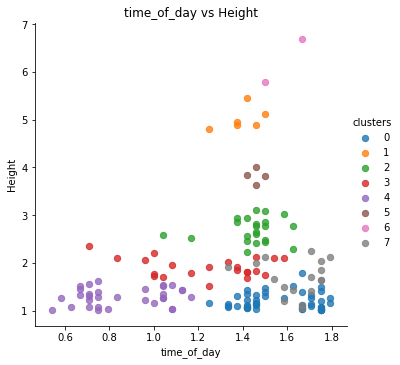

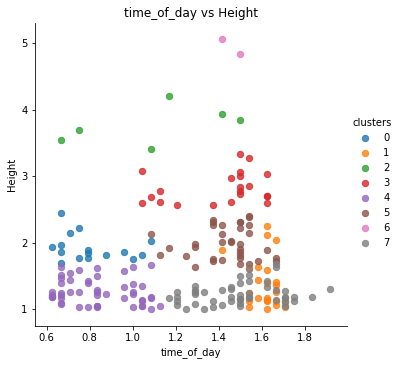

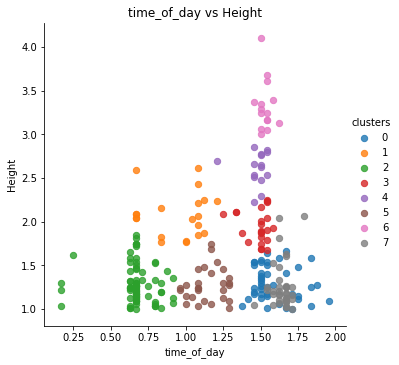

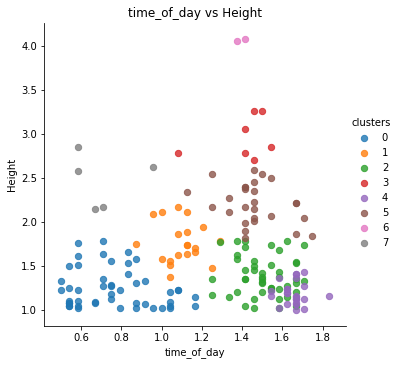

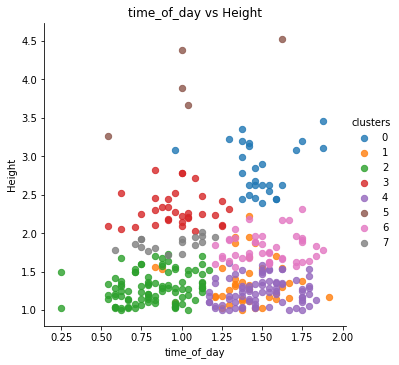

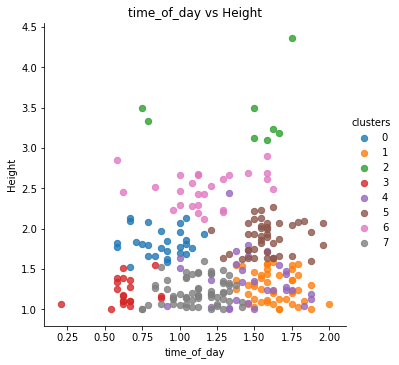

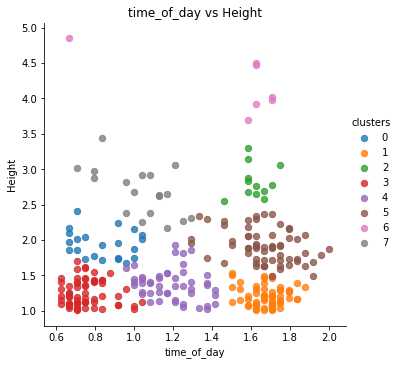

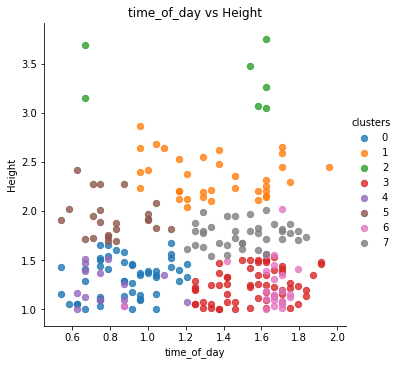

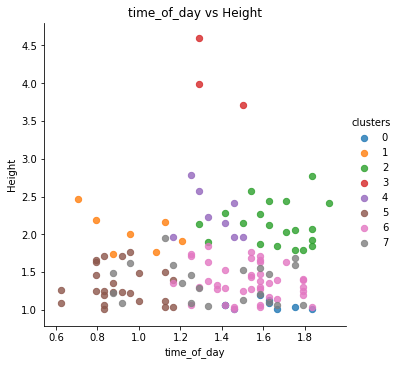

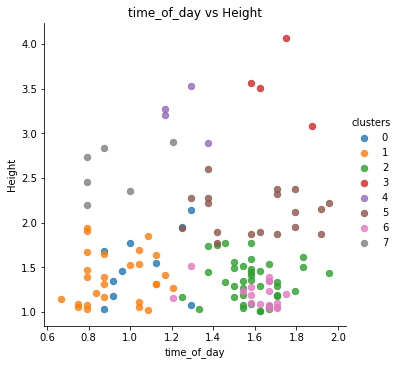

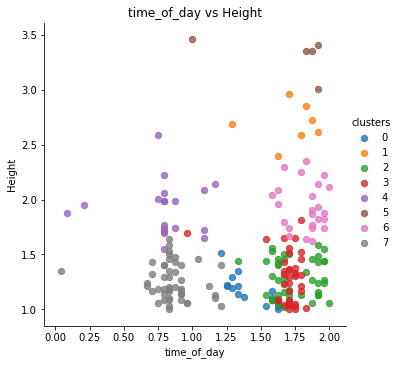

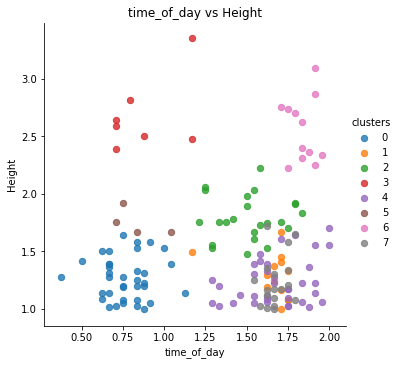

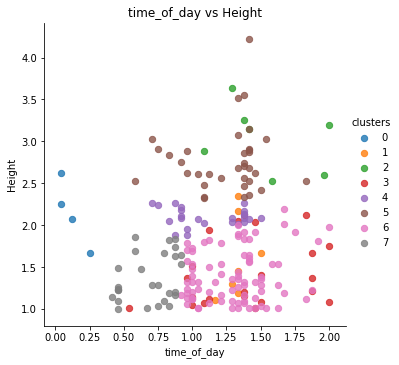

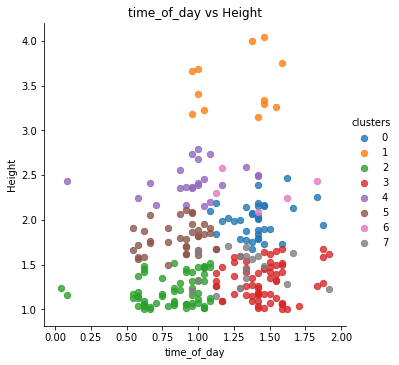

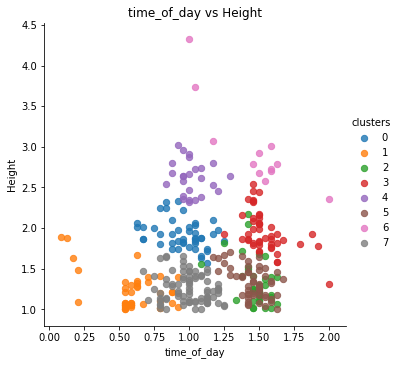

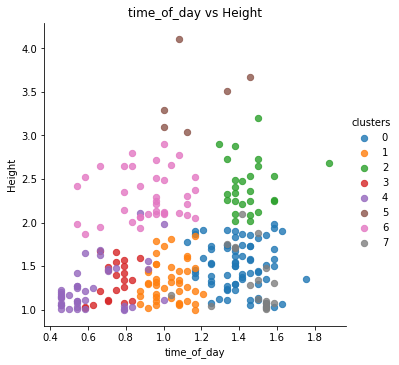

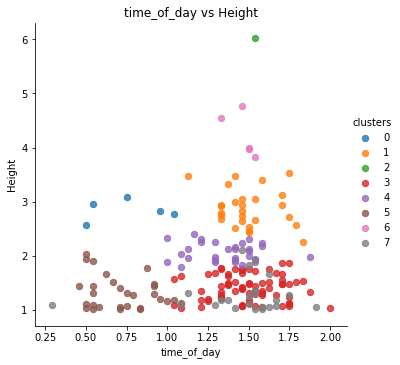

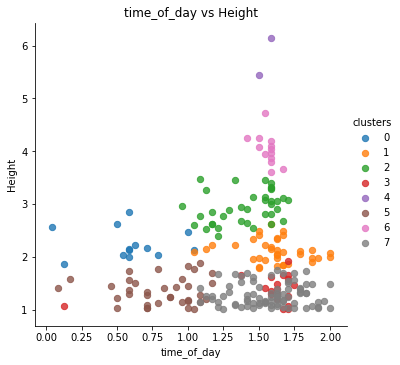

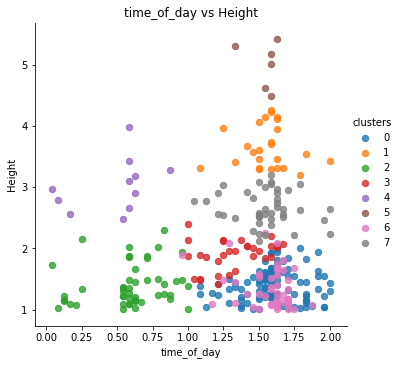

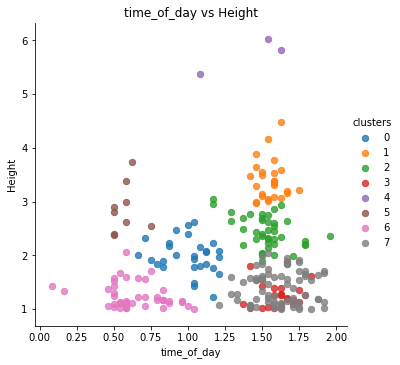

In [59]:
#tied
houses_array = [2332,89,306,4,2551]

for i in houses_array:
    seasonal_spike_2d(i,8)

HOUSE NO:  2332
Summer
Autumn
Winter
Spring
HOUSE NO:  89
Summer
Autumn
Winter
Spring
HOUSE NO:  306
Summer
Autumn
Winter
Spring
HOUSE NO:  4
Summer
Autumn
Winter
Spring
HOUSE NO:  2551
Summer
Autumn
Winter
Spring


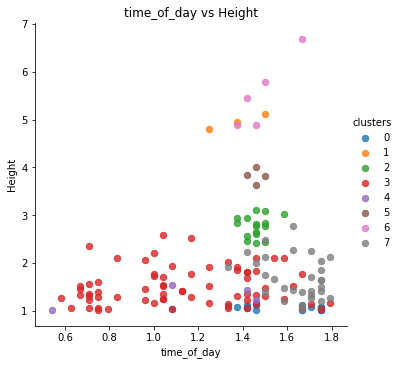

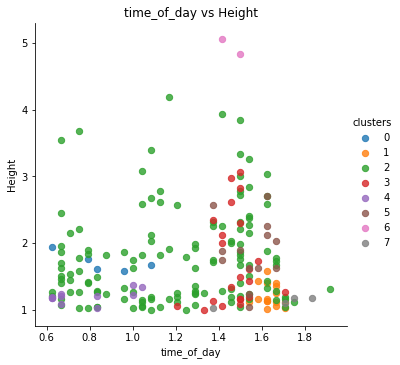

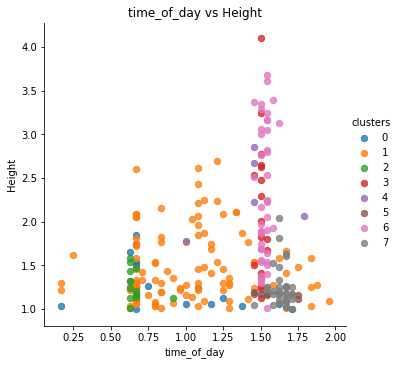

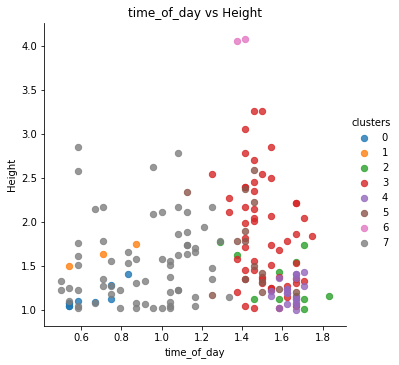

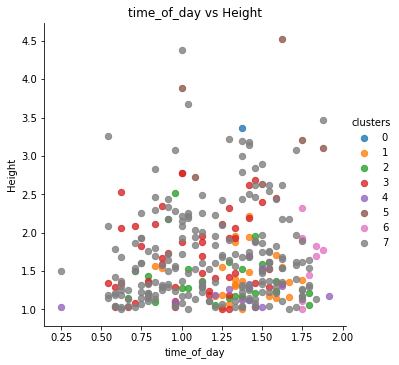

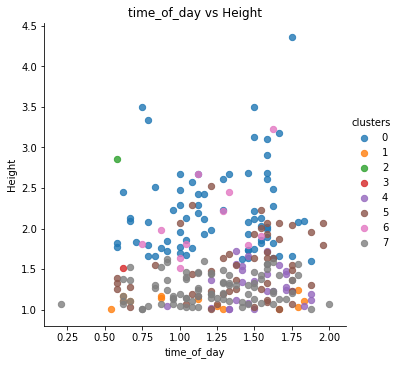

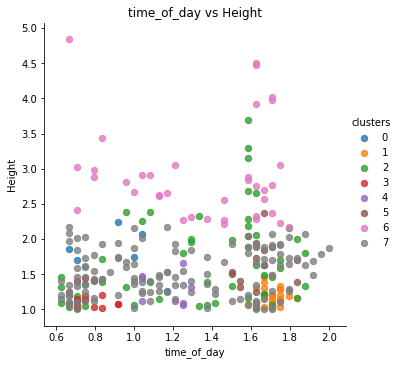

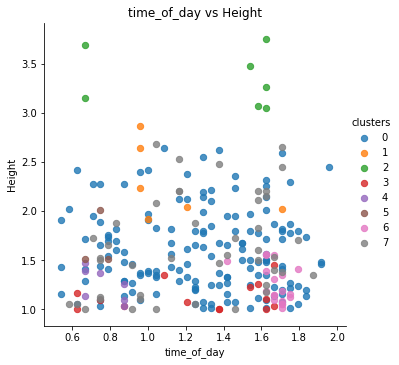

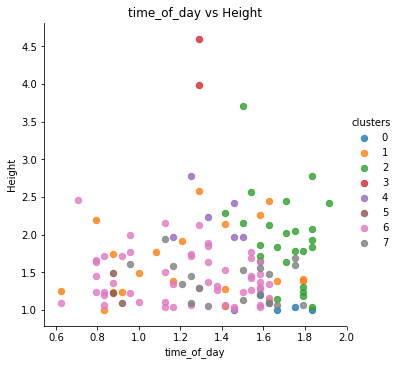

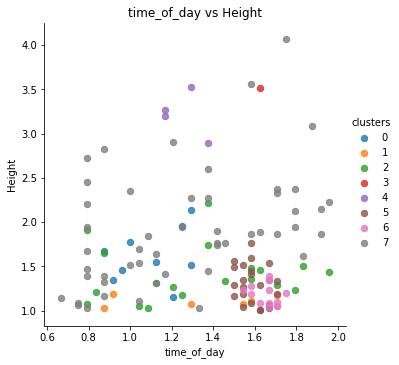

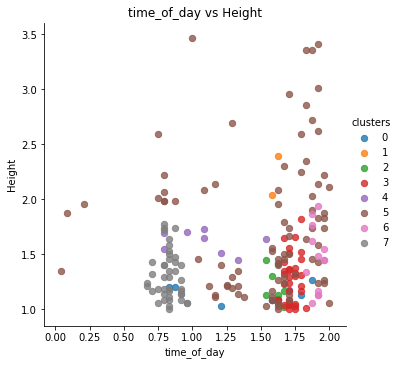

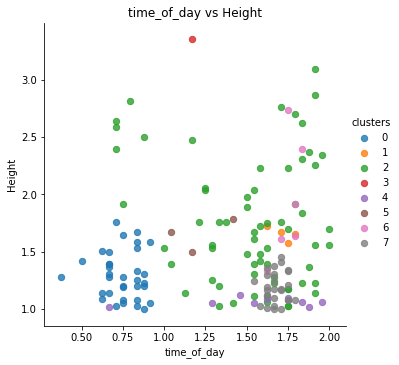

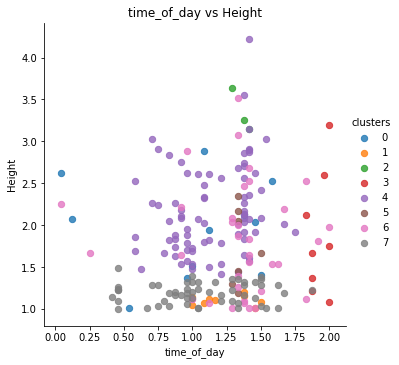

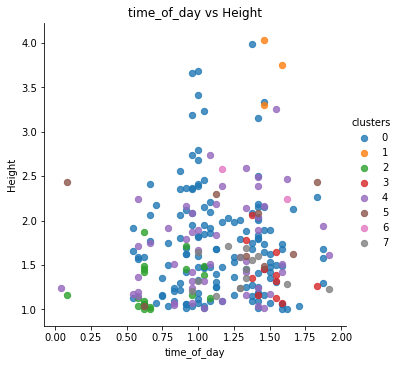

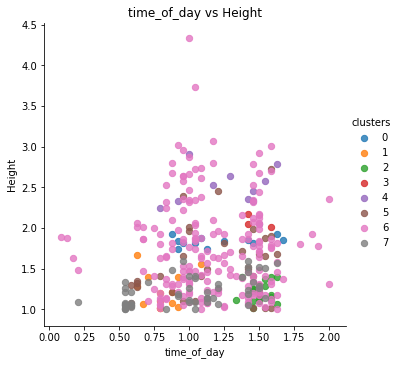

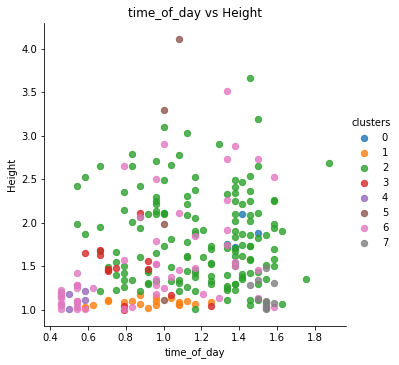

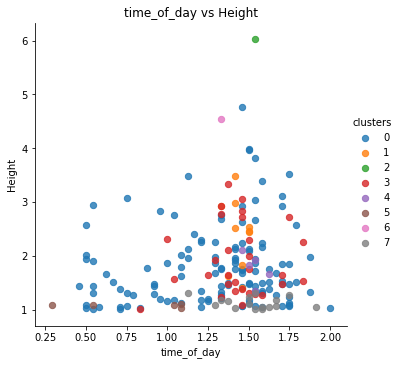

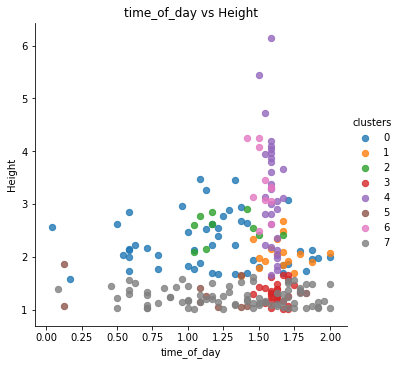

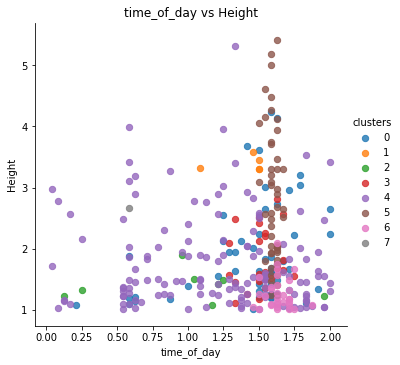

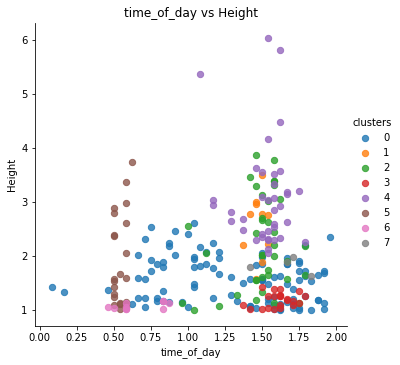

In [54]:
houses_array = [2332,89,306,4,2551]

for i in houses_array:
    seasonal_spike_2d(i,8)

HOUSE NO:  2732
Summer
Autumn
Winter
Spring
HOUSE NO:  916
Summer
Autumn
Winter
Spring
HOUSE NO:  4
Summer
Autumn
Winter
Spring
HOUSE NO:  2705
Summer
Autumn
Winter
Spring
HOUSE NO:  1028
Summer
Autumn
Winter
Spring
HOUSE NO:  1577
Summer


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Autumn


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Winter
Spring


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



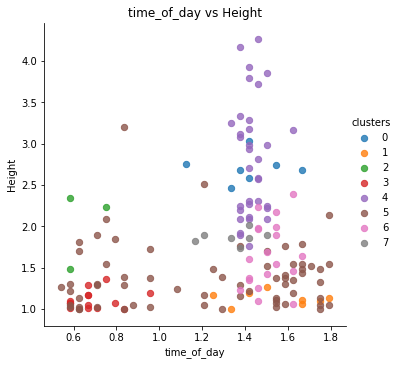

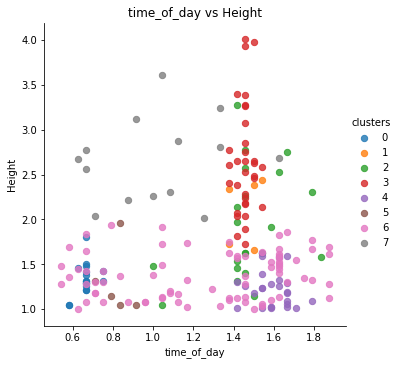

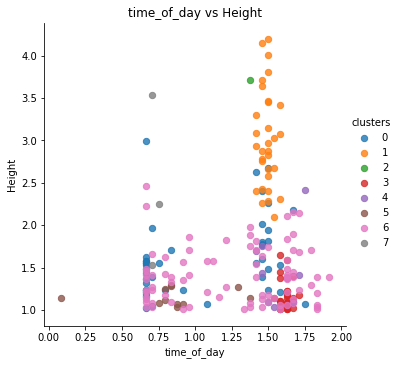

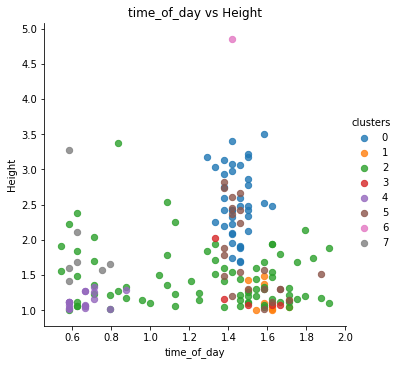

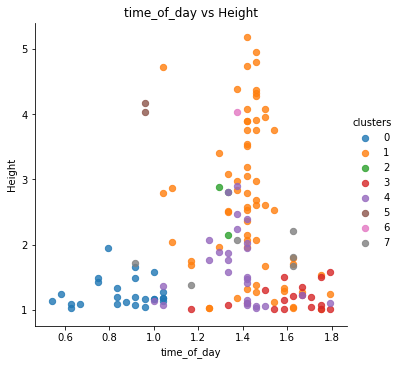

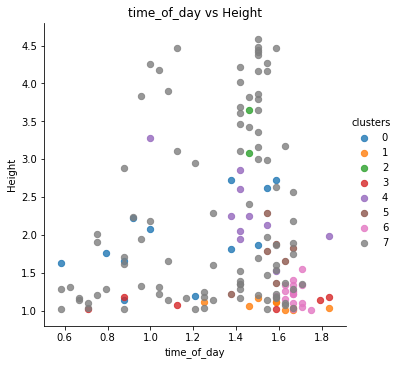

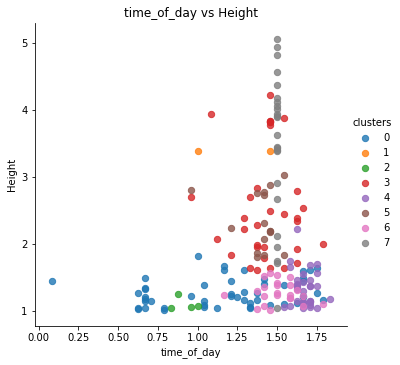

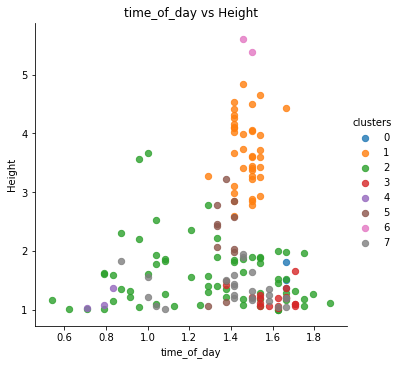

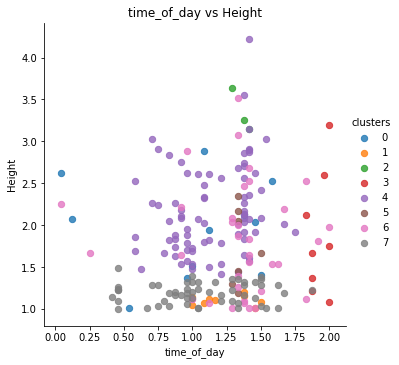

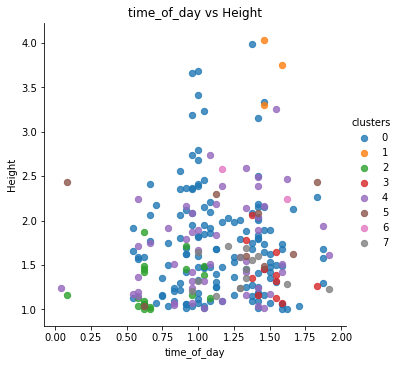

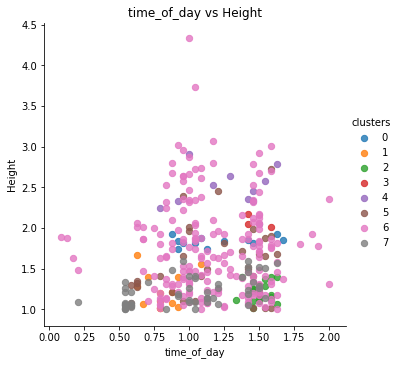

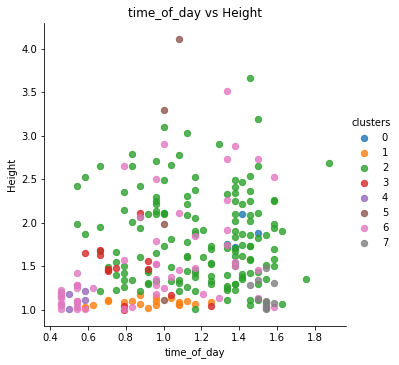

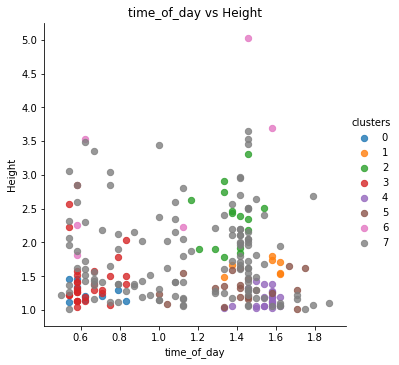

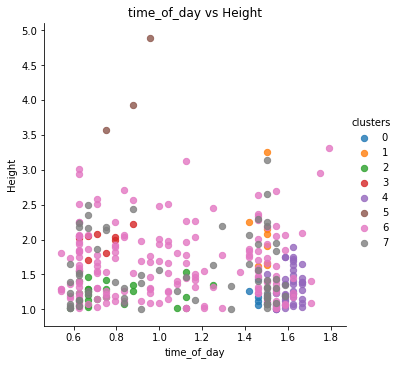

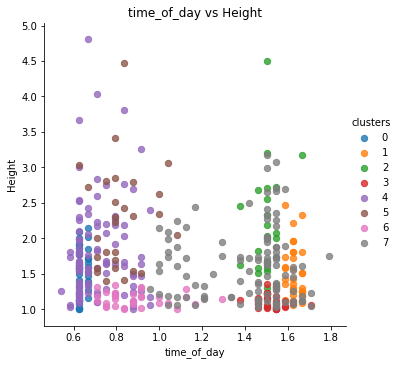

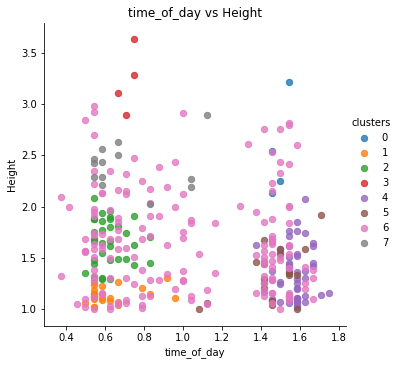

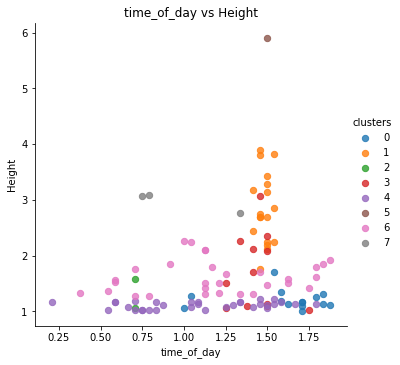

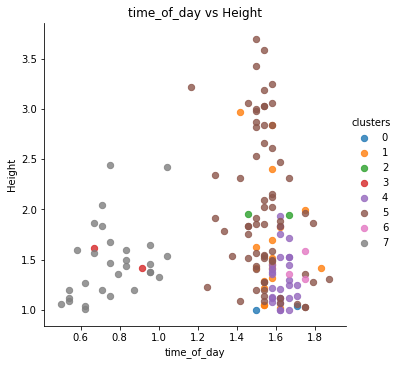

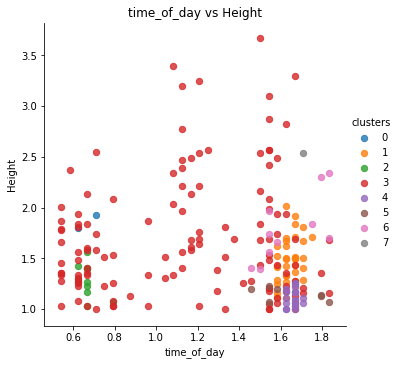

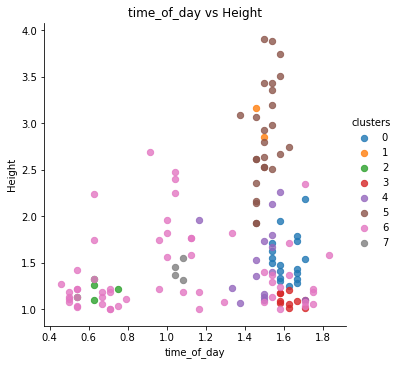

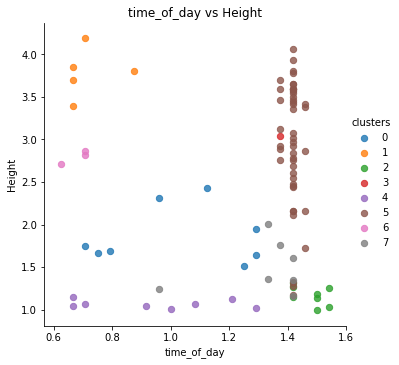

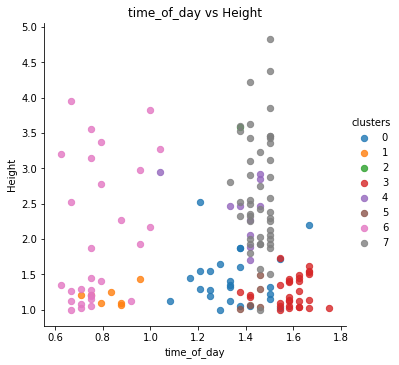

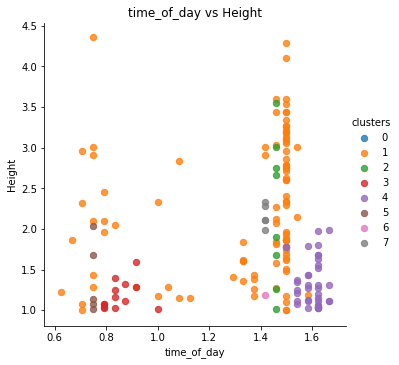

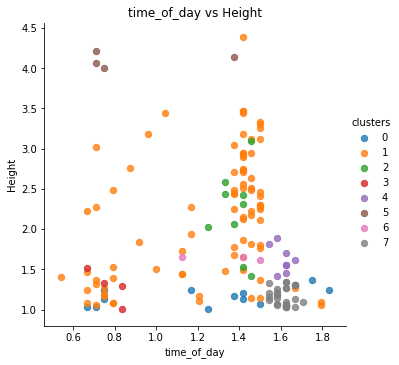

In [57]:
houses_array = [2732,916,4,2705,1028,1577]

for i in houses_array:
    seasonal_spike_2d(i,8)